# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Hanfiy Zamaksyary Qurthuby
- **Email:** hanfiyzamaksyary@gmail.com
- **ID Dicoding:** Hanfiy Zamaksyary Qurthuby

## Menentukan Pertanyaan Bisnis
- Bagaimana rata-rata Polutan Utama (PM2.5 & PM10) di Setiap Stasiun?
- Stasiun mana yang memiliki Tingkat Polusi Tertinggi dan Terendah?
- Bagaimana tren bulanan dan tahunan polutan utama?
- Bagaimana Hubungan antara Polutan Utama dengan Kondisi Cuaca seperti Suhu, Tekanan, dan lainnya?
- Apakah Ada Pola Musiman dalam Kadar Polutan Utama?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
aotizhongxin_df = pd.read_csv("data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
aotizhongxin_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
changping_df = pd.read_csv("data/PRSA_Data_Changping_20130301-20170228.csv")
changping_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [5]:
dingling_df = pd.read_csv("data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [6]:
dongsi_df = pd.read_csv("data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [7]:
guanyuan_df = pd.read_csv("data/PRSA_Data_Guanyuan_20130301-20170228.csv")
guanyuan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan


In [8]:
gucheng_df = pd.read_csv("data/PRSA_Data_Gucheng_20130301-20170228.csv")
gucheng_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


In [9]:
huairou_df = pd.read_csv("data/PRSA_Data_Huairou_20130301-20170228.csv")
huairou_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


In [10]:
nongzhanguan_df = pd.read_csv("data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
nongzhanguan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan


In [11]:
shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv")
shunyi_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [12]:
tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [13]:
wanliu_df = pd.read_csv("data/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliu_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [14]:
wanshouxigong_df = pd.read_csv("data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
wanshouxigong_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


### Insight
- terdapat 12 dataframe dengan 18 kolom yang sama
- Dataframe ini merupakan data air quality yang menggunakan index datatime

### Assesing Data

#### Assesing aotizhongxin_df

In [15]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [16]:
aotizhongxin_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [17]:
print("Jumlah duplikasi: ", aotizhongxin_df.duplicated().sum())
aotizhongxin_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


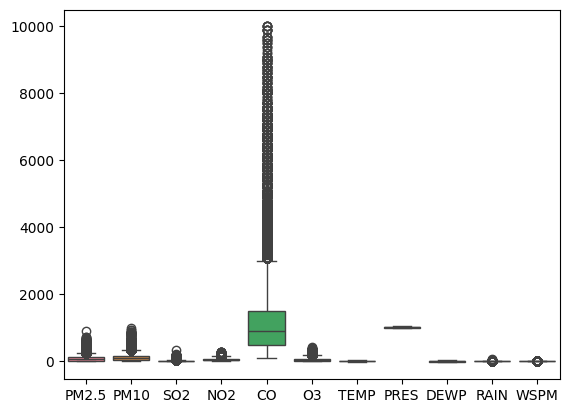

In [18]:
sns.boxplot(data=aotizhongxin_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

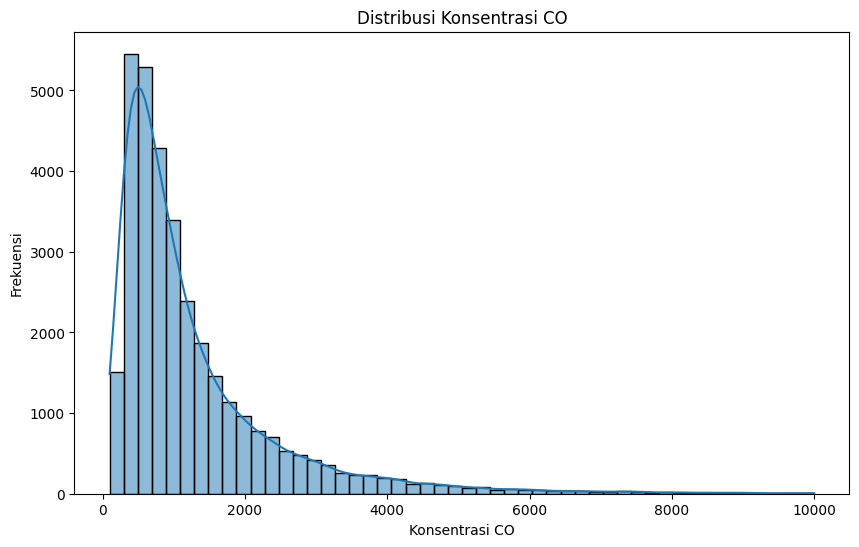

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(aotizhongxin_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing changping_df

In [20]:
changping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [21]:
changping_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", changping_df.duplicated().sum())
changping_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


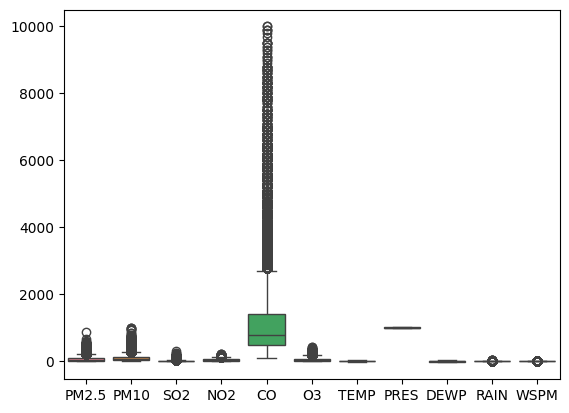

In [23]:
sns.boxplot(data=changping_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

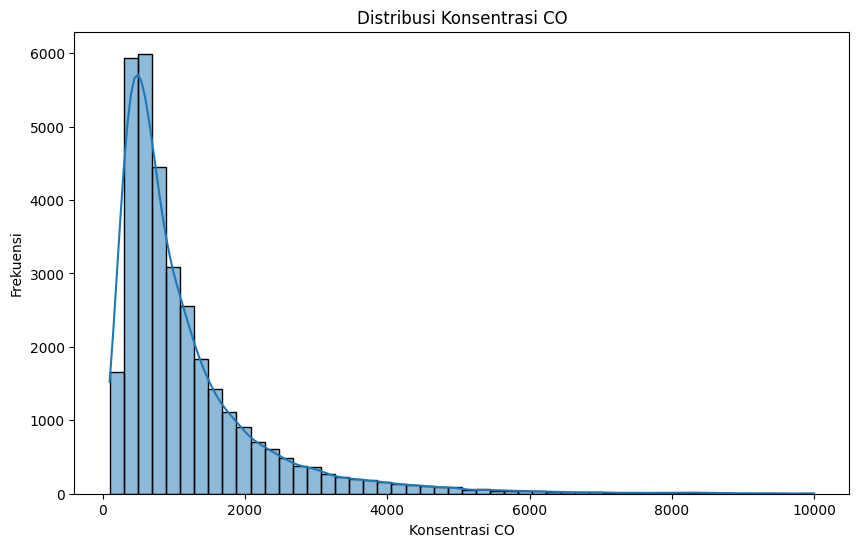

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(changping_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing dingling_df

In [25]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [26]:
dingling_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [27]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())
dingling_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


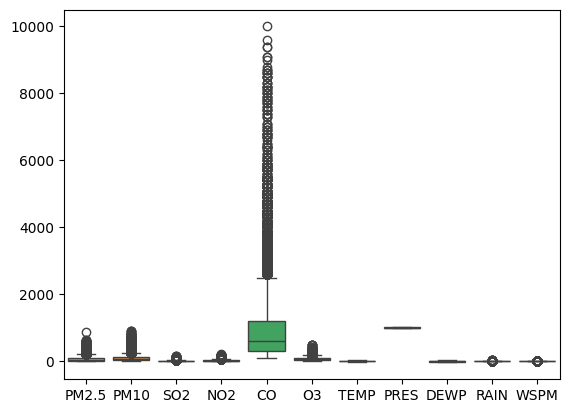

In [28]:
sns.boxplot(data=dingling_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

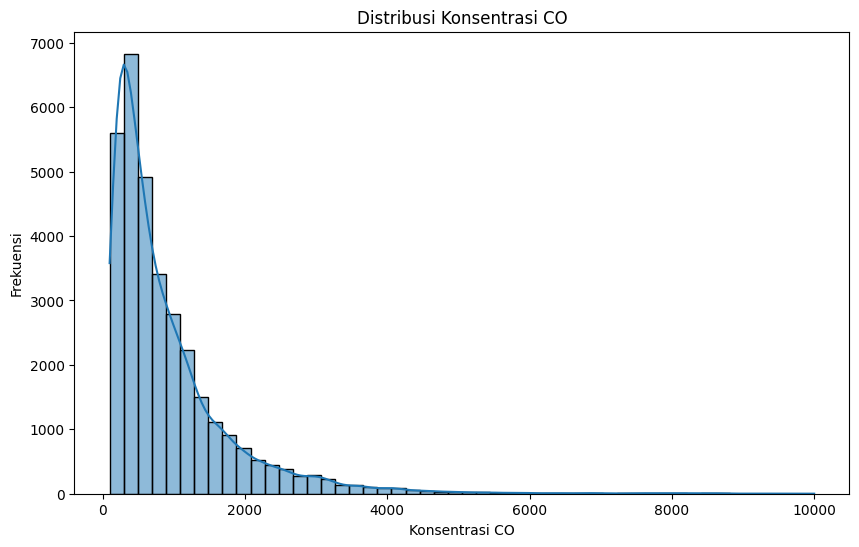

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(dingling_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing dongsi_df

In [30]:
dongsi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [31]:
dongsi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [32]:
print("Jumlah duplikasi: ", dongsi_df.duplicated().sum())
dongsi_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


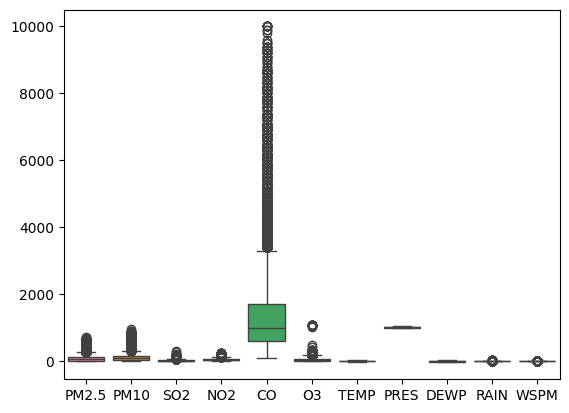

In [33]:
sns.boxplot(data=dongsi_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

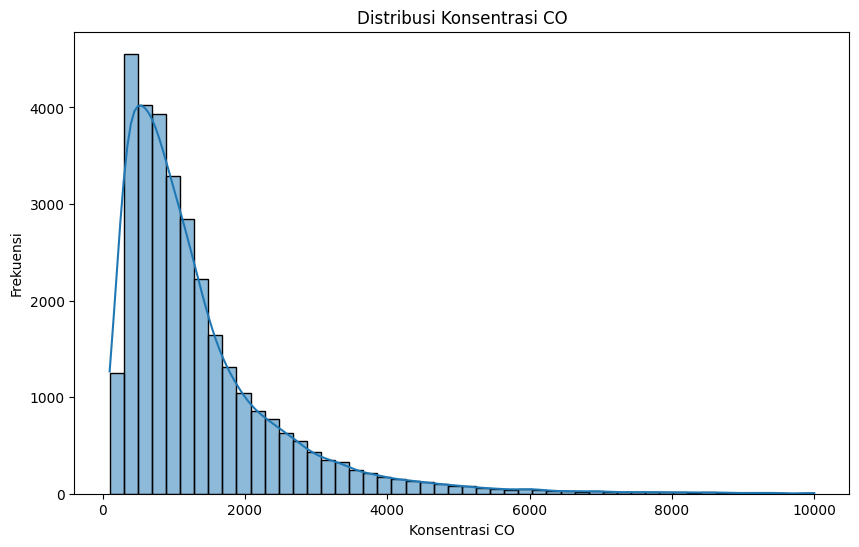

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(dongsi_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing guanyuan_df

In [35]:
guanyuan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [36]:
guanyuan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [37]:
print("Jumlah duplikasi: ", guanyuan_df.duplicated().sum())
guanyuan_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


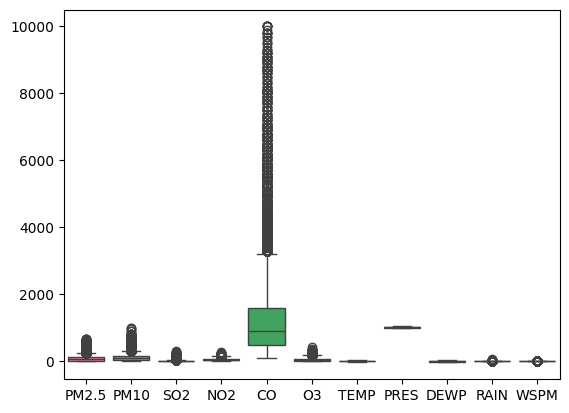

In [38]:
sns.boxplot(data=guanyuan_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

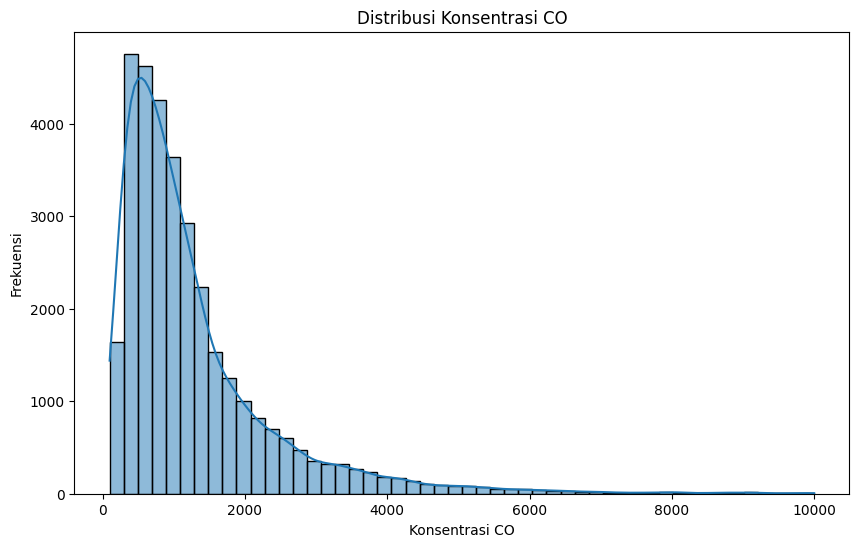

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(guanyuan_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing gucheng_df

In [40]:
gucheng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [41]:
gucheng_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [42]:
print("Jumlah duplikasi: ", gucheng_df.duplicated().sum())
gucheng_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34418.000000,34683.000000,34557.000000,34396.000000,33663.000000,34335.000000,35013.000000,35014.000000,35013.000000,35021.000000,35022.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.852089,118.861978,15.366162,55.871075,1323.974423,57.694879,13.864524,1008.829592,2.610442,0.064453,1.343310
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.796445,96.742626,21.204526,36.473860,1208.957772,57.019587,11.292857,10.103256,13.782991,0.838654,1.151064
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-15.600000,984.000000,-34.600000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,24.000000,45.000000,2.000000,26.000000,600.000000,10.000000,3.600000,1000.500000,-8.900000,0.000000,0.600000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,99.000000,7.000000,50.000000,900.000000,45.000000,14.800000,1008.500000,3.000000,0.000000,1.000000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.750000,167.000000,20.000000,79.000000,1600.000000,83.000000,23.500000,1017.000000,15.300000,0.000000,1.800000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,770.000000,994.000000,500.000000,276.000000,10000.000000,450.000000,41.600000,1038.100000,27.400000,41.900000,12.000000


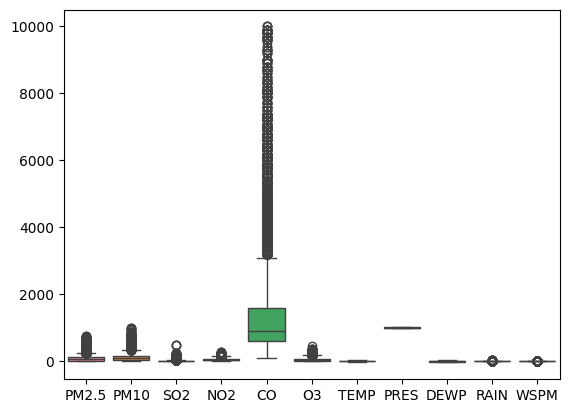

In [43]:
sns.boxplot(data=gucheng_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

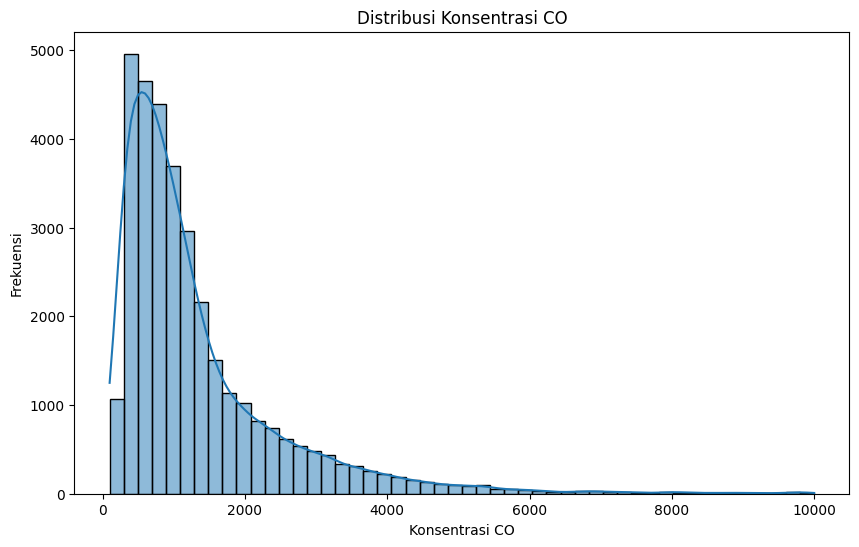

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(gucheng_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing huairou_df

In [45]:
huairou_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [46]:
huairou_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [47]:
print("Jumlah duplikasi: ", huairou_df.duplicated().sum())
huairou_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


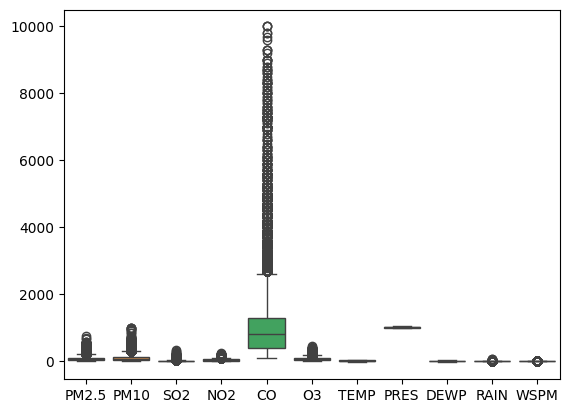

In [48]:
sns.boxplot(data=huairou_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

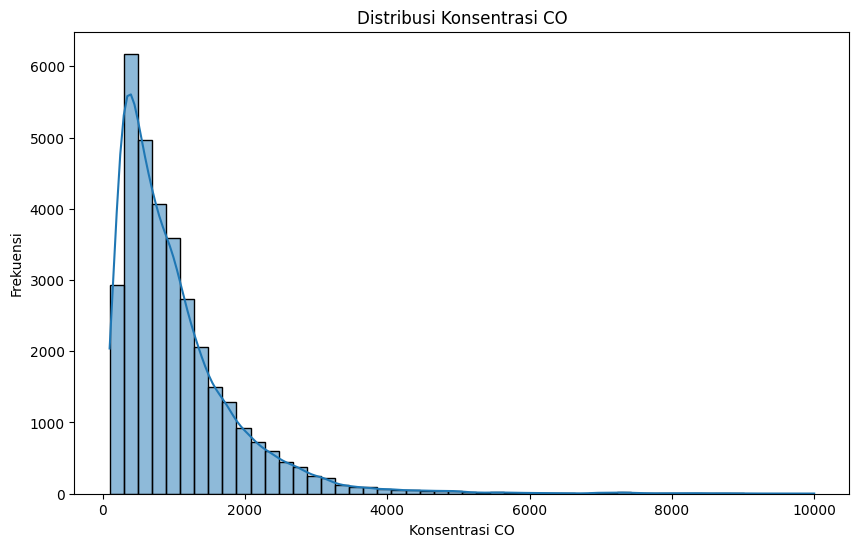

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(huairou_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing nongzhanguan_df

In [50]:
nongzhanguan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [51]:
nongzhanguan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [52]:
print("Jumlah duplikasi: ", nongzhanguan_df.duplicated().sum())
nongzhanguan_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34436.000000,34624.000000,34618.000000,34372.000000,33858.000000,34558.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,84.838483,108.991096,18.689242,58.097172,1324.350198,58.534682,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.225344,95.341177,24.280665,36.297740,1245.166124,58.401448,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.571200,2.000000,100.000000,0.214200,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,29.000000,500.000000,10.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,9.000000,51.000000,900.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,149.000000,23.000000,80.000000,1600.000000,84.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,844.000000,995.000000,257.000000,273.000000,10000.000000,390.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


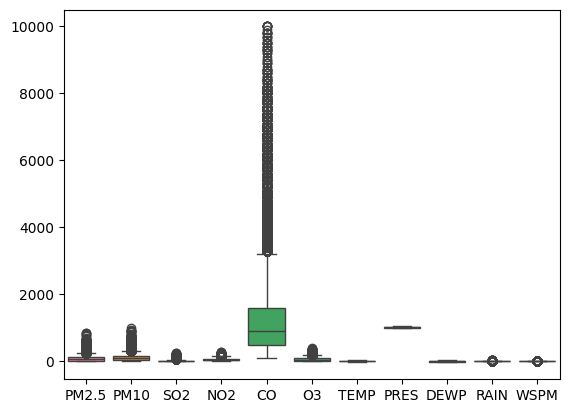

In [53]:
sns.boxplot(data=nongzhanguan_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

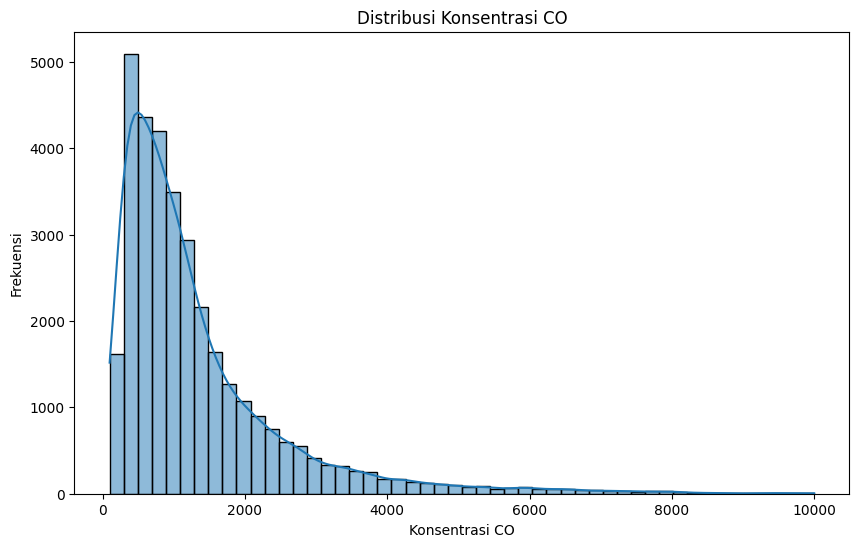

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(nongzhanguan_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing shunyi_df

In [55]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [56]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [57]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum())
shunyi_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


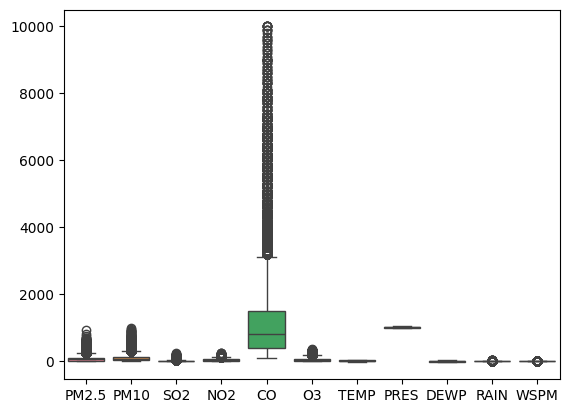

In [58]:
sns.boxplot(data=shunyi_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

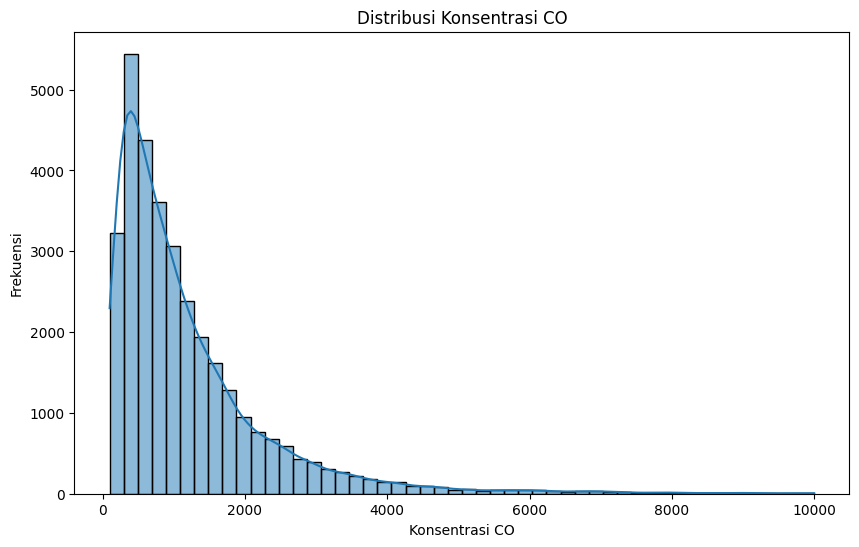

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(shunyi_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing tiantan_df

In [60]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [61]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [62]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())
tiantan_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


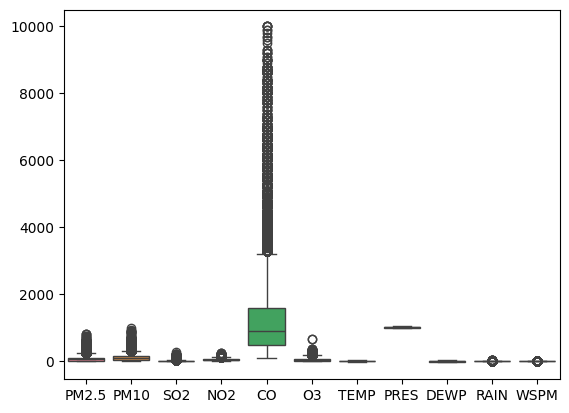

In [63]:
sns.boxplot(data=tiantan_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

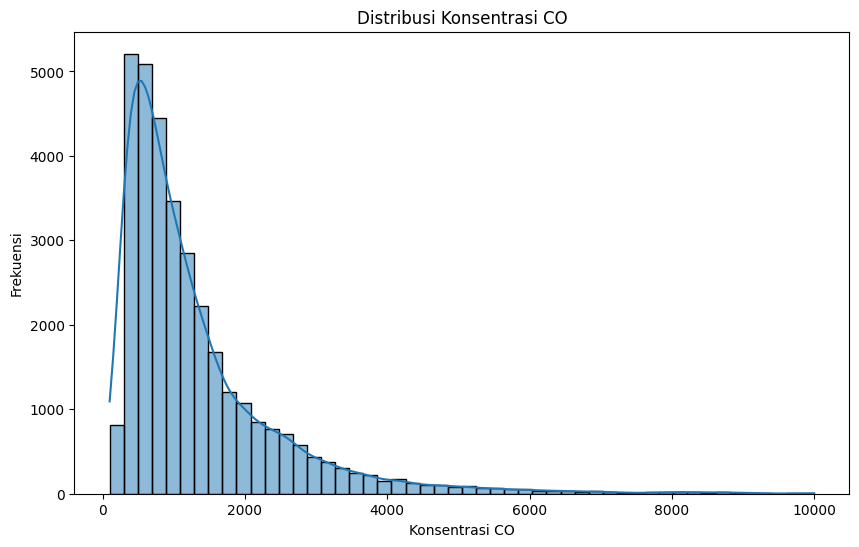

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(tiantan_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing wanliu_df

In [65]:
wanliu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [66]:
wanliu_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [67]:
print("Jumlah duplikasi: ", wanliu_df.duplicated().sum())
wanliu_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34682.000000,34780.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.374716,110.464618,18.376481,65.258789,1319.353513,48.873614,13.428865,1011.097536,3.266588,0.068263,1.501215
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.905568,92.795065,22.609648,37.996088,1268.114331,55.111740,11.346931,10.355247,13.678060,0.896726,1.104472
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,4.000000,36.000000,500.000000,4.000000,3.200000,1002.500000,-8.100000,0.000000,0.800000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,88.000000,10.000000,60.000000,900.000000,32.000000,14.300000,1010.800000,4.000000,0.000000,1.200000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,153.000000,23.000000,88.000000,1600.000000,73.000000,22.900000,1019.400000,15.800000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.200000


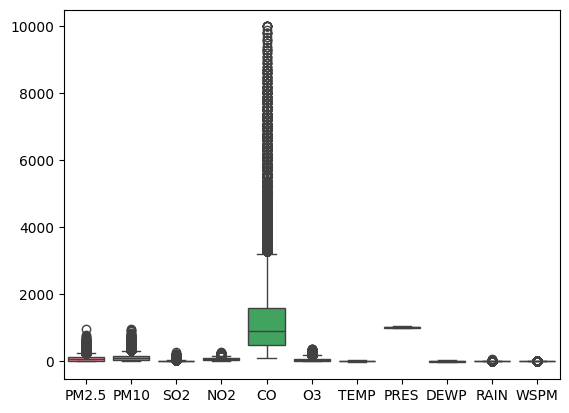

In [68]:
sns.boxplot(data=wanliu_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

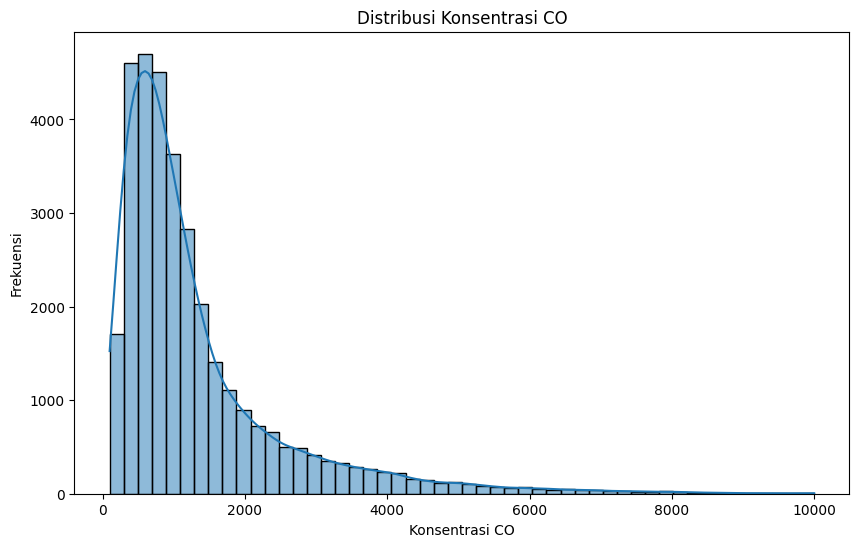

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(wanliu_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

#### Assesing wanshouxigong_df

In [70]:
wanshouxigong_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [71]:
wanshouxigong_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [72]:
print("Jumlah duplikasi: ", wanshouxigong_df.duplicated().sum())
wanshouxigong_df.describe()

Jumlah duplikasi:  0


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


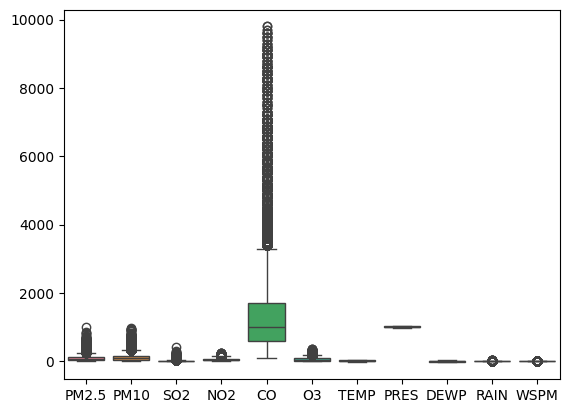

In [73]:
sns.boxplot(data=wanshouxigong_df[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]])
plt.show()

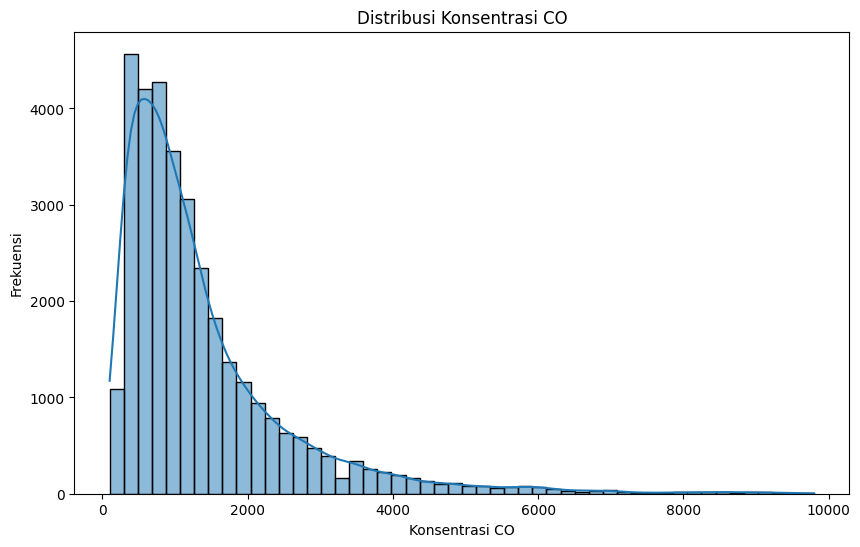

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(wanshouxigong_df['CO'], bins=50, kde=True)
plt.title('Distribusi Konsentrasi CO')
plt.xlabel('Konsentrasi CO')
plt.ylabel('Frekuensi')
plt.show()

### Insight
- tidak terdapat duplikasi data pada ke 12 dataframe
- tidak terdapat data type yang salah, perlu penyesuaian terhadap data type int dari kolom year, month, day, hour ke 1 kolom tipe data datatime
- range untuk year, month, day, hour tidak terdapat kesalahan
- kolom wd merupakan data kategorikal tetapi memiliki missing values
- semua dataframe memiliki pola outliers yang sama, terdapat konsistensi pola
- ke 12 dataframe station memiliki missing values pada kolom PM2.5, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM
- terlihat missing values pada kolom TEMP, PRES, DEWP, RAIN memiliki pola yaitu memiliki jumlah missing values yang tidak jauh berbeda angkanya

### Cleaning Data

In [75]:
# membuat list data dari ke 12 dataframe
list_of_station = [aotizhongxin_df,
                    changping_df,
                    dingling_df,
                    dongsi_df,
                    guanyuan_df,
                    gucheng_df,
                    huairou_df,
                    nongzhanguan_df,
                    shunyi_df,
                    tiantan_df,
                    wanliu_df,
                    wanshouxigong_df
                   ]

In [76]:
aotizhongxin_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
9183,9184,2014,3,18,15,73.0,283.0,38.0,49.0,1100.0,71.0,13.3,1015.6,-1.1,0.0,SW,4.0,Aotizhongxin
4738,4739,2013,9,14,10,80.0,85.0,5.0,69.0,1400.0,8.0,25.4,1003.5,20.6,0.0,N,0.8,Aotizhongxin
28808,28809,2016,6,13,8,34.0,34.0,2.0,30.0,500.0,78.0,20.4,1000.3,16.4,0.0,N,2.0,Aotizhongxin
12060,12061,2014,7,16,12,166.0,166.0,2.0,62.0,1400.0,71.0,27.0,997.9,24.1,0.5,N,0.0,Aotizhongxin
11816,11817,2014,7,6,8,233.0,233.0,2.0,65.0,1400.0,34.0,27.3,999.9,24.0,0.0,NNE,0.8,Aotizhongxin


In [77]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [78]:
# menambahkan kolom datetime berdasarkan kolom year, month, day, hour
for dfs in list_of_station:
    dfs['datetime'] = pd.to_datetime(dfs[['year','month','day','hour']])

In [79]:
aotizhongxin_df.sample()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
25422,25423,2016,1,24,6,9.0,63.0,4.0,9.0,700.0,58.0,-14.3,1038.1,-30.1,0.0,NW,4.4,Aotizhongxin,2016-01-24 06:00:00


In [80]:
# melakukan drop kepada kolom year, month, day, hour dikarenakan sudah terdapat kolom datetime
for dfs in list_of_station:
    dfs.drop(['year','month','day','hour'], axis=1, inplace=True)

In [81]:
aotizhongxin_df.sample()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
28688,28689,115.0,115.0,2.0,30.0,1200.0,48.0,20.9,1005.9,18.1,0.0,ENE,1.8,Aotizhongxin,2016-06-08 08:00:00


In [82]:
aotizhongxin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   PM2.5     34139 non-null  float64       
 2   PM10      34346 non-null  float64       
 3   SO2       34129 non-null  float64       
 4   NO2       34041 non-null  float64       
 5   CO        33288 non-null  float64       
 6   O3        33345 non-null  float64       
 7   TEMP      35044 non-null  float64       
 8   PRES      35044 non-null  float64       
 9   DEWP      35044 non-null  float64       
 10  RAIN      35044 non-null  float64       
 11  wd        34983 non-null  object        
 12  WSPM      35050 non-null  float64       
 13  station   35064 non-null  object        
 14  datetime  35064 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(11), int64(1), object(2)
memory usage: 4.0+ MB


In [83]:
# mengatasi missing values dengan melakukan interpolasi method datetime pada kolom dengan tipe data float
for dfs in list_of_station:
    dfs.set_index('datetime', inplace=True)
    float_columns_interpolated = dfs.select_dtypes(include=['float']).interpolate(method='time')
    dfs.update(float_columns_interpolated)

In [84]:
# menggabungkan ke 12 station dataframe menjadi 1 dataframe
all_station_dfs = pd.concat(list_of_station, axis=0)

In [85]:
all_station_dfs.isna().sum()

No            0
PM2.5         0
PM10          0
SO2           0
NO2          22
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

In [86]:
all_station_dfs[all_station_dfs['NO2'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 00:00:00,1,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
2013-03-01 01:00:00,2,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2013-03-01 02:00:00,3,5.0,18.0,5.5,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
2013-03-01 03:00:00,4,6.0,20.0,6.0,NaN,650.0,62.5,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
2013-03-01 04:00:00,5,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng
2013-03-01 05:00:00,6,4.0,11.0,3.0,NaN,700.0,87.0,-1.8,1023.6,-21.9,0.0,E,1.2,Gucheng
2013-03-01 06:00:00,7,3.0,6.0,3.0,NaN,700.0,92.0,-2.6,1024.3,-20.4,0.0,ENE,1.2,Gucheng


In [87]:
# dikarenakan masih ada missing values pada kolom NO2, dilakukan menggunakan method backward fill
for dfs in list_of_station:
    dfs['NO2'] = dfs['NO2'].bfill()

In [88]:
dingling_df[dingling_df['NO2'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,


In [89]:
gucheng_df[gucheng_df['NO2'].isna()]

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,


In [90]:
# mengatasi missing values dengan imputation front fill pada kolom wd (karena kolom wd merupakan data kategorikal)
for dfs in list_of_station:
    dfs['wd'] = dfs['wd'].ffill()

In [91]:
# melakukan concat ulang untuk melihat hasil dari mengisian missing values
all_station_dfs = pd.concat(list_of_station, axis=0)

In [92]:
all_station_dfs.isna().sum()

No         0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [93]:
all_station_dfs.sample(20)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-10-27 19:00:00,5780,251.0,306.0,30.0,217.0,2300.000000,3.00000,8.9,1009.5,5.1,0.0,N,0.0,Gucheng
2013-12-13 03:00:00,6892,44.0,50.0,30.0,44.0,1050.000000,1.71360,-3.2,1022.0,-22.0,0.0,NW,1.3,Nongzhanguan
2015-07-07 14:00:00,20607,58.0,79.0,8.0,16.0,700.000000,243.00000,31.9,1001.8,15.8,0.0,SW,2.5,Wanliu
2016-06-02 05:00:00,28542,41.0,74.0,7.0,72.0,700.000000,4.00000,17.1,1007.3,7.2,0.0,NNE,1.3,Aotizhongxin
2016-04-24 15:00:00,27616,154.0,181.0,40.0,39.0,800.000000,153.00000,23.7,1003.4,4.1,0.0,WSW,4.5,Nongzhanguan
2015-03-14 08:00:00,17841,69.0,72.0,40.0,77.0,2200.000000,7.00000,0.7,1020.4,-4.9,0.0,E,1.2,Nongzhanguan
2016-05-01 11:00:00,27780,169.0,246.0,27.0,14.0,1900.000000,145.00000,24.9,992.1,16.6,0.0,SSW,1.9,Huairou
2016-10-11 09:00:00,31690,119.0,119.0,6.0,65.0,1200.000000,7.00000,14.8,1019.1,9.6,0.0,E,1.2,Guanyuan
2013-12-14 02:00:00,6915,65.0,82.0,60.0,67.0,785.067873,4.62672,-7.1,1020.8,-14.0,0.0,WNW,0.8,Guanyuan


In [94]:
all_station_dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 420768 entries, 2013-03-01 00:00:00 to 2017-02-28 23:00:00
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   PM2.5    420768 non-null  float64
 2   PM10     420768 non-null  float64
 3   SO2      420768 non-null  float64
 4   NO2      420768 non-null  float64
 5   CO       420768 non-null  float64
 6   O3       420768 non-null  float64
 7   TEMP     420768 non-null  float64
 8   PRES     420768 non-null  float64
 9   DEWP     420768 non-null  float64
 10  RAIN     420768 non-null  float64
 11  wd       420768 non-null  object 
 12  WSPM     420768 non-null  float64
 13  station  420768 non-null  object 
dtypes: float64(11), int64(1), object(2)
memory usage: 48.2+ MB


### Insight
- dilakukan method hybrid yaitu dengan menggunakan method interpolation time dan method bfill untuk kolom NO2 yang tidak bisa dilakukan interpolasi time
- pada kolom NO2 yang gagal dilakukan interpolasi itu dikarenakan adanya data missing values terdapat pada row 1 (data pertama, tanggal pertama dan jam 00) dataframe dingling_df dan gucheng_df

## Exploratory Data Analysis (EDA)

### Explore data polutan PM2.5

In [258]:
# Bagaimana rata-rata PM2.5 di setiap stasiun selama periode tertentu (bulanan dan tahunan)?

# Rata-rata PM2.5 per station
avg_pm25_station = all_station_dfs.groupby('station')['PM2.5'].mean().sort_values(ascending=False)
print(avg_pm25_station)

station
Dongsi           86.144243
Nongzhanguan     85.079472
Wanshouxigong    85.067548
Gucheng          84.074802
Wanliu           83.467612
Guanyuan         82.897522
Aotizhongxin     82.540623
Tiantan          82.033097
Shunyi           79.437962
Changping        70.986438
Huairou          69.501747
Dingling         66.845557
Name: PM2.5, dtype: float64


In [96]:
# Rata-rata bulanan PM2.5
monthly_avg_pm25 = all_station_dfs.groupby(all_station_dfs.index.to_period('M'))['PM2.5'].mean()
print(monthly_avg_pm25)

datetime
2013-03    104.571909
2013-04     62.207292
2013-05     81.876512
2013-06    101.542242
2013-07     66.839665
2013-08     60.588374
2013-09     76.140304
2013-10     91.765320
2013-11     73.821007
2013-12     78.159890
2014-01     98.390065
2014-02    153.808780
2014-03     95.227431
2014-04     91.825231
2014-05     62.177315
2014-06     54.435571
2014-07     89.148141
2014-08     63.157616
2014-09     66.250880
2014-10    119.375728
2014-11     87.279994
2014-12     58.221890
2015-01     96.122711
2015-02     93.078199
2015-03     86.384123
2015-04     71.839560
2015-05     55.727503
2015-06     60.668414
2015-07     60.951501
2015-08     44.303707
2015-09     48.758218
2015-10     70.132728
2015-11    114.757465
2015-12    149.601759
2016-01     66.799619
2016-02     42.821959
2016-03     92.193716
2016-04     67.596528
2016-05     54.383262
2016-06     58.703962
2016-07     68.665155
2016-08     45.812220
2016-09     53.974884
2016-10     85.589662
2016-11     97.437384
2

In [97]:
# Rata-rata bulanan PM2.5 per station
monthly_avg_pm25_station = all_station_dfs.groupby([all_station_dfs.index.to_period('M'), 'station'])['PM2.5'].mean()
print(monthly_avg_pm25_station)

datetime  station      
2013-03   Aotizhongxin     110.092742
          Changping         98.916667
          Dingling          95.705645
          Dongsi           108.413978
          Guanyuan         102.719086
                              ...    
2017-02   Nongzhanguan      75.948661
          Shunyi            70.232143
          Tiantan           71.781250
          Wanliu            69.665179
          Wanshouxigong     77.686756
Name: PM2.5, Length: 576, dtype: float64


In [98]:
# Rata-rata tahunan PM2.5
yearly_avg_pm25 = all_station_dfs.groupby(all_station_dfs.index.to_period('Y'))['PM2.5'].mean()
print(yearly_avg_pm25)

datetime
2013    79.768553
2014    86.183671
2015    79.306423
2016    72.078419
2017    92.407898
Freq: Y-DEC, Name: PM2.5, dtype: float64


In [99]:
# Rata-rata tahunan PM2.5 per station
yearly_avg_pm25_station = all_station_dfs.groupby([all_station_dfs.index.to_period('Y'), 'station'])['PM2.5'].mean()
print(yearly_avg_pm25_station)

datetime  station      
2013      Aotizhongxin      82.439202
          Changping         72.393246
          Dingling          65.200980
          Dongsi            86.814474
          Guanyuan          81.651893
          Gucheng           81.498298
          Huairou           68.619145
          Nongzhanguan      84.377996
          Shunyi            75.746460
          Tiantan           83.210172
          Wanliu            91.486179
          Wanshouxigong     83.784586
2014      Aotizhongxin      89.747603
          Changping         79.881998
          Dingling          75.643006
          Dongsi            87.979304
          Guanyuan          88.527374
          Gucheng           90.549121
          Huairou           77.143487
          Nongzhanguan      91.998082
          Shunyi            85.190993
          Tiantan           86.689874
          Wanliu            90.371107
          Wanshouxigong     90.482100
2015      Aotizhongxin      81.831724
          Changping       

### Explore data polutan PM10

In [100]:
# Bagaimana rata-rata PM10 di setiap stasiun selama periode tertentu (bulanan dan tahunan)?

# Rata-rata PM10 per station
avg_pm10_station = all_station_dfs.groupby('station')['PM10'].mean().sort_values(ascending=False)
print(avg_pm10_station)

station
Gucheng          119.261567
Wanshouxigong    112.505795
Wanliu           110.707858
Dongsi           110.347617
Aotizhongxin     110.210033
Nongzhanguan     109.384022
Guanyuan         109.372349
Tiantan          106.537076
Shunyi            99.271936
Changping         94.788575
Huairou           92.422670
Dingling          84.113713
Name: PM10, dtype: float64


In [245]:
# Rata-rata bulanan PM10
monthly_avg_pm10 = all_station_dfs['PM10'].resample('ME').mean()
print(monthly_avg_pm10)

datetime
2013-03-31    130.249832
2013-04-30     95.931510
2013-05-31    134.408462
2013-06-30    115.859546
2013-07-31     76.424118
2013-08-31     77.461302
2013-09-30     96.402862
2013-10-31    112.675042
2013-11-30     96.244676
2013-12-31     96.066980
2014-01-31    123.645105
2014-02-28    156.681982
2014-03-31    136.205645
2014-04-30    144.124306
2014-05-31    116.993721
2014-06-30     74.037310
2014-07-31    109.784067
2014-08-31     85.454615
2014-09-30     90.316042
2014-10-31    146.505544
2014-11-30    125.516979
2014-12-31     95.371698
2015-01-31    113.719538
2015-02-28    120.783495
2015-03-31    146.016252
2015-04-30    115.078432
2015-05-31     95.617059
2015-06-30     80.524329
2015-07-31     75.412444
2015-08-31     64.862455
2015-09-30     63.247743
2015-10-31     89.317148
2015-11-30    120.251620
2015-12-31    159.541611
2016-01-31     82.528674
2016-02-29     57.133800
2016-03-31    134.401938
2016-04-30    114.085648
2016-05-31     86.902363
2016-06-30     7

In [102]:
# Rata-rata bulanan PM10 per station
monthly_avg_pm10_station = all_station_dfs.groupby([all_station_dfs.index.to_period('M'), 'station'])['PM10'].mean()
print(monthly_avg_pm10_station)

datetime  station      
2013-03   Aotizhongxin     144.622984
          Changping        123.430108
          Dingling         109.645161
          Dongsi           131.579301
          Guanyuan         130.422043
                              ...    
2017-02   Nongzhanguan      92.727679
          Shunyi            80.240327
          Tiantan           95.707589
          Wanliu            85.656994
          Wanshouxigong     90.906250
Name: PM10, Length: 576, dtype: float64


In [254]:
# Rata-rata tahunan PM10
yearly_avg_pm10 = all_station_dfs['PM10'].resample('YE').mean()
print(yearly_avg_pm10)

datetime
2013-12-31    103.199397
2014-12-31    116.821115
2015-12-31    103.655023
2016-12-31     94.751717
2017-12-31    110.880797
Freq: YE-DEC, Name: PM10, dtype: float64


In [186]:
# Rata-rata tahunan PM10 per station
yearly_avg_pm10_station = all_station_dfs.groupby([all_station_dfs.index.to_period('Y'), 'station'])['PM10'].mean()
print(yearly_avg_pm10_station)

datetime  station      
2013      Aotizhongxin     112.940836
          Changping         91.176675
          Dingling          78.884940
          Dongsi           104.619213
          Guanyuan         108.949074
          Gucheng          112.558211
          Huairou           98.509191
          Nongzhanguan     103.735090
          Shunyi            95.145084
          Tiantan          108.312704
          Wanliu           112.366694
          Wanshouxigong    111.195057
2014      Aotizhongxin     122.282112
          Changping        107.611416
          Dingling          91.554865
          Dongsi           117.451986
          Guanyuan         116.123402
          Gucheng          134.781427
          Huairou           99.877363
          Nongzhanguan     127.224053
          Shunyi           111.620913
          Tiantan          114.889526
          Wanliu           131.279212
          Wanshouxigong    127.157100
2015      Aotizhongxin     112.176747
          Changping       

### Rata rata polutan lainnya disetiap stasiun

In [107]:
# Bagaimana rata-rata CO di setiap stasiun selama periode tertentu (bulanan dan tahunan)?

# Rata-rata CO per station
avg_co_station = all_station_dfs.groupby('station')['CO'].mean().sort_values(ascending=False)
print(avg_co_station)

station
Wanshouxigong    1373.618569
Gucheng          1338.100060
Dongsi           1331.913045
Wanliu           1328.761180
Nongzhanguan     1327.767611
Tiantan          1305.333262
Aotizhongxin     1264.692405
Guanyuan         1258.327045
Shunyi           1197.904660
Changping        1156.990246
Huairou          1019.671871
Dingling          925.111838
Name: CO, dtype: float64


In [108]:
# Rata-rata bulanan CO
monthly_avg_co = all_station_dfs.groupby(all_station_dfs.index.to_period('M'))['CO'].mean()
print(monthly_avg_co)

datetime
2013-03    1449.916555
2013-04     893.442556
2013-05     999.638868
2013-06    1336.573507
2013-07     983.447806
2013-08     885.594970
2013-09    1156.336891
2013-10    1225.272486
2013-11    1422.621653
2013-12    1699.831868
2014-01    1964.342518
2014-02    2195.882937
2014-03    1394.002016
2014-04     924.247685
2014-05     835.280807
2014-06     798.635759
2014-07     932.039651
2014-08     842.590726
2014-09     990.075231
2014-10    1331.093190
2014-11    1569.149306
2014-12    1539.766278
2015-01    1901.771580
2015-02    1454.792907
2015-03    1186.111111
2015-04     755.619213
2015-05     721.303763
2015-06    1051.712963
2015-07     814.241711
2015-08     780.006720
2015-09     809.826389
2015-10     944.690860
2015-11    1935.795718
2015-12    2789.832549
2016-01    1564.034498
2016-02     882.704741
2016-03    1210.663082
2016-04     779.577546
2016-05     679.215950
2016-06     742.668981
2016-07     894.177614
2016-08     816.905495
2016-09     751.614583
20

In [109]:
# Rata-rata tahunan CO
yearly_avg_co = all_station_dfs.groupby(all_station_dfs.index.to_period('Y'))['CO'].mean()
print(yearly_avg_co)

datetime
2013    1205.307246
2014    1271.124746
2015    1261.916540
2016    1138.022256
2017    1617.493526
Freq: Y-DEC, Name: CO, dtype: float64


In [110]:
# Bagaimana rata-rata SO2 di setiap stasiun selama periode tertentu (bulanan dan tahunan)?

# Rata-rata SO2 per station
avg_so2_station = all_station_dfs.groupby('station')['SO2'].mean().sort_values(ascending=False)
print(avg_so2_station)

station
Nongzhanguan     18.760102
Dongsi           18.506142
Wanliu           18.409514
Guanyuan         17.609312
Aotizhongxin     17.459251
Wanshouxigong    17.363354
Gucheng          15.705821
Changping        14.943066
Tiantan          14.510018
Shunyi           13.445971
Huairou          12.446681
Dingling         11.797849
Name: SO2, dtype: float64


In [111]:
# Rata-rata bulanan SO2
monthly_avg_so2 = all_station_dfs.groupby(all_station_dfs.index.to_period('M'))['SO2'].mean()
print(monthly_avg_so2)

datetime
2013-03    38.530270
2013-04    20.686866
2013-05    26.376841
2013-06    13.607299
2013-07     7.273532
2013-08     6.903814
2013-09    10.196775
2013-10    15.604848
2013-11    21.838826
2013-12    38.527883
2014-01    53.391913
2014-02    57.920945
2014-03    34.750112
2014-04    17.128935
2014-05    15.162549
2014-06     6.281222
2014-07     6.541846
2014-08     5.377576
2014-09     6.684780
2014-10     8.910338
2014-11    16.443380
2014-12    28.177658
2015-01    34.258559
2015-02    26.663715
2015-03    20.791919
2015-04     9.285347
2015-05     8.722278
2015-06     6.707060
2015-07     4.794187
2015-08     3.594590
2015-09     4.894155
2015-10     5.854223
2015-11    11.772222
2015-12    19.314236
2016-01    19.873824
2016-02    14.570821
2016-03    17.770833
2016-04     9.794155
2016-05     8.069478
2016-06     5.018773
2016-07     3.477935
2016-08     2.857863
2016-09     3.384549
2016-10     4.317574
2016-11    11.118889
2016-12    17.049451
2017-01    18.554996
2017

In [112]:
# Rata-rata tahunan SO2
yearly_avg_so2 = all_station_dfs.groupby(all_station_dfs.index.to_period('Y'))['SO2'].mean()
print(yearly_avg_so2)

datetime
2013    19.998777
2014    21.204405
2015    12.996102
2016     9.775876
2017    18.105815
Freq: Y-DEC, Name: SO2, dtype: float64


In [113]:
# Bagaimana rata-rata NO2 di setiap stasiun selama periode tertentu (bulanan dan tahunan)?

# Rata-rata NO2 per station
avg_no2_station = all_station_dfs.groupby('station')['NO2'].mean().sort_values(ascending=False)
print(avg_no2_station)

station
Wanliu           65.668418
Aotizhongxin     59.074106
Guanyuan         58.139298
Nongzhanguan     58.095053
Gucheng          55.822315
Wanshouxigong    55.495402
Dongsi           53.953078
Tiantan          53.258828
Changping        44.206153
Shunyi           44.094695
Huairou          32.077275
Dingling         27.303589
Name: NO2, dtype: float64


In [114]:
# Rata-rata bulanan NO2
monthly_avg_no2 = all_station_dfs.groupby(all_station_dfs.index.to_period('M'))['NO2'].mean()
print(monthly_avg_no2)

datetime
2013-03    67.224501
2013-04    46.141377
2013-05    50.161956
2013-06    48.107797
2013-07    38.686568
2013-08    39.014629
2013-09    51.574292
2013-10    63.289317
2013-11    55.824141
2013-12    60.240006
2014-01    65.586712
2014-02    71.997375
2014-03    63.464606
2014-04    57.278819
2014-05    47.374303
2014-06    39.305935
2014-07    37.867921
2014-08    41.772043
2014-09    48.579259
2014-10    70.265793
2014-11    65.697072
2014-12    52.725017
2015-01    66.022491
2015-02    51.133036
2015-03    53.905888
2015-04    45.635056
2015-05    37.260181
2015-06    34.796470
2015-07    34.467742
2015-08    29.843974
2015-09    40.574421
2015-10    52.042675
2015-11    59.615104
2015-12    74.358983
2016-01    50.560372
2016-02    33.495271
2016-03    55.275986
2016-04    41.846123
2016-05    36.214953
2016-06    34.071921
2016-07    31.592798
2016-08    32.941812
2016-09    40.604803
2016-10    53.295139
2016-11    65.642593
2016-12    77.497200
2017-01    63.105007
2017

In [115]:
# Rata-rata tahunan NO2
yearly_avg_no2 = all_station_dfs.groupby(all_station_dfs.index.to_period('Y'))['NO2'].mean()
print(yearly_avg_no2)

datetime
2013    52.047564
2014    55.047965
2015    48.315936
2016    46.161344
2017    57.215837
Freq: Y-DEC, Name: NO2, dtype: float64


In [116]:
# Bagaimana rata-rata 2 O3 di setiap stasiun selama periode tertentu (bulanan dan tahunan)?

# Rata-rata O3 per station
avg_o3_station = all_station_dfs.groupby('station')['O3'].mean().sort_values(ascending=False)
print(avg_o3_station)

station
Dingling         70.530792
Huairou          60.872173
Nongzhanguan     58.432876
Gucheng          58.000001
Changping        57.976253
Dongsi           57.700357
Tiantan          56.148077
Wanshouxigong    55.919979
Aotizhongxin     55.328626
Guanyuan         54.817142
Shunyi           54.218810
Wanliu           46.909375
Name: O3, dtype: float64


In [117]:
# Rata-rata bulanan O3
monthly_avg_o3 = all_station_dfs.groupby(all_station_dfs.index.to_period('M'))['O3'].mean()
print(monthly_avg_o3)

datetime
2013-03     56.343421
2013-04     62.019991
2013-05     87.335402
2013-06     74.326906
2013-07     78.583951
2013-08     82.128581
2013-09     47.868048
2013-10     27.941544
2013-11     23.815611
2013-12     21.673963
2014-01     21.747628
2014-02     27.186074
2014-03     47.223230
2014-04     70.264410
2014-05     90.165052
2014-06    100.527965
2014-07    102.935781
2014-08     96.871130
2014-09     57.025012
2014-10     27.684420
2014-11     22.656487
2014-12     28.165371
2015-01     23.603978
2015-02     39.082403
2015-03     50.685977
2015-04     77.110990
2015-05     96.679167
2015-06     95.021655
2015-07    102.600414
2015-08     94.050459
2015-09     59.582465
2015-10     39.525650
2015-11     14.555382
2015-12     17.324485
2016-01     30.177475
2016-02     48.607938
2016-03     48.741263
2016-04     71.468981
2016-05     95.864460
2016-06    109.540694
2016-07    101.198365
2016-08     78.494176
2016-09     55.180556
2016-10     23.772905
2016-11     16.738657
2

In [118]:
# Rata-rata tahunan O3
yearly_avg_o3 = all_station_dfs.groupby(all_station_dfs.index.to_period('Y'))['O3'].mean()
print(yearly_avg_o3)

datetime
2013    56.258593
2014    57.901362
2015    59.290400
2016    58.134273
2017    39.953625
Freq: Y-DEC, Name: O3, dtype: float64


### Korelasi antara data polutan utama dengan kondisi cuaca

In [105]:
# Korelasi PM2.5 dengan parameter cuaca
correlation_pm25 = all_station_dfs[['PM2.5', 'TEMP', 'RAIN', 'PRES', 'DEWP', 'WSPM']].corr()
print(correlation_pm25)

          PM2.5      TEMP      RAIN      PRES      DEWP      WSPM
PM2.5  1.000000 -0.131607 -0.014452  0.019862  0.113045 -0.271425
TEMP  -0.131607  1.000000  0.037647 -0.813312  0.820247  0.032601
RAIN  -0.014452  0.037647  1.000000 -0.060952  0.086259  0.020975
PRES   0.019862 -0.813312 -0.060952  1.000000 -0.750271  0.065400
DEWP   0.113045  0.820247  0.086259 -0.750271  1.000000 -0.296771
WSPM  -0.271425  0.032601  0.020975  0.065400 -0.296771  1.000000


In [106]:
# Korelasi PM10 dengan parameter cuaca
correlation_pm10 = all_station_dfs[['PM10', 'TEMP', 'RAIN', 'PRES', 'DEWP', 'WSPM']].corr()
print(correlation_pm10)

          PM10      TEMP      RAIN      PRES      DEWP      WSPM
PM10  1.000000 -0.096078 -0.026505 -0.018375  0.067674 -0.178200
TEMP -0.096078  1.000000  0.037647 -0.813312  0.820247  0.032601
RAIN -0.026505  0.037647  1.000000 -0.060952  0.086259  0.020975
PRES -0.018375 -0.813312 -0.060952  1.000000 -0.750271  0.065400
DEWP  0.067674  0.820247  0.086259 -0.750271  1.000000 -0.296771
WSPM -0.178200  0.032601  0.020975  0.065400 -0.296771  1.000000


### Explore data berdasarkan musim

In [119]:
# menambah kolom baru yaitu musim (season) dengan mendefinisikan berdasarkan bulan

def get_season(month):
    if month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    elif month in [9, 10, 11]:  # Autumn
        return 'Autumn'
    else:  # Winter
        return 'Winter'

all_station_dfs['season'] = all_station_dfs.index.month.map(get_season)

In [120]:
all_station_dfs.sample(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
datetime,,,,,,,,,,,,,,,
2014-06-08 07:00:00,11144,13.0,23.0,2.0,21.0,300.0,38.0,20.7,994.5,12.7,0.0,ESE,0.9,Huairou,Summer
2016-08-07 14:00:00,30135,13.0,13.0,2.0,5.0,500.0,65.0,31.7,998.8,21.5,0.0,WSW,2.0,Huairou,Summer
2015-12-29 07:00:00,24800,317.0,333.0,42.0,104.0,5000.0,3.0,-6.0,1025.9,-7.5,0.0,NE,0.9,Dongsi,Winter
2016-04-25 15:00:00,27640,37.0,110.0,11.0,8.0,500.0,194.0,27.4,1006.9,8.3,0.0,SSW,4.1,Tiantan,Spring
2015-03-06 02:00:00,17643,136.0,160.0,47.0,77.0,1500.0,25.0,-1.4,1018.1,-12.1,0.0,E,1.1,Aotizhongxin,Spring
2013-12-27 05:00:00,7230,12.0,8.0,26.0,52.0,700.0,20.0,-3.2,1028.6,-20.5,0.0,NNW,3.1,Dongsi,Winter
2015-04-28 10:00:00,18923,36.0,64.0,3.0,26.0,700.0,66.0,20.7,1003.4,10.8,0.0,SSW,1.1,Changping,Spring
2016-02-13 10:00:00,25907,7.0,7.0,8.0,15.0,300.0,54.0,1.5,1021.5,-13.1,0.0,NNW,4.5,Guanyuan,Winter
2016-06-29 13:00:00,29198,122.0,122.0,2.0,25.0,900.0,154.0,27.8,999.6,19.1,0.0,S,1.5,Aotizhongxin,Summer


In [121]:
# Bagaimana perubahan rata-rata PM2.5 dan PM10 sepanjang musim?

#Rata-rata polusi PM2.5 per musim
seasonal_avg_pm25 = all_station_dfs.groupby('season')['PM2.5'].mean()
print(seasonal_avg_pm25)

season
Autumn    82.212557
Spring    77.208840
Summer    64.521640
Winter    95.744159
Name: PM2.5, dtype: float64


In [122]:
#Rata-rata polusi PM10 per musim
seasonal_avg_pm10 = all_station_dfs.groupby('season')['PM10'].mean()
print(seasonal_avg_pm10)

season
Autumn    103.387437
Spring    120.872963
Summer     80.864329
Winter    114.685736
Name: PM10, dtype: float64


In [123]:
#Rata-rata polusi SO2 per musim
seasonal_avg_so2 = all_station_dfs.groupby('season')['SO2'].mean()
print(seasonal_avg_so2)

season
Autumn    10.069516
Spring    18.973538
Summer     6.016011
Winter    28.774423
Name: SO2, dtype: float64


In [124]:
#Rata-rata polusi NO2 per musim
seasonal_avg_no2 = all_station_dfs.groupby('season')['NO2'].mean()
print(seasonal_avg_no2)

season
Autumn    55.629207
Spring    50.174986
Summer    36.848576
Winter    59.976352
Name: NO2, dtype: float64


In [125]:
#Rata-rata polusi CO per musim
seasonal_avg_co = all_station_dfs.groupby('season')['CO'].mean()
print(seasonal_avg_co)

season
Autumn    1250.303911
Spring     987.355181
Summer     905.725222
Winter    1810.438057
Name: CO, dtype: float64


In [126]:
#Rata-rata polusi O3 per musim
seasonal_avg_o3 = all_station_dfs.groupby('season')['O3'].mean()
print(seasonal_avg_o3)

season
Autumn    34.641007
Spring    71.168772
Summer    93.003438
Winter    29.362412
Name: O3, dtype: float64


### Insight
- Secara keseluruhan, PM2.5 dan PM10 menunjukkan korelasi yang sangat lemah dengan sebagian besar parameter cuaca.
- PM2.5 dan kecepatan angin (WSPM), di mana kecepatan angin yang lebih tinggi sedikit mengurangi konsentrasi PM2.5.
- Korelasi negatif yang lemah dengan suhu (TEMP) pada PM2.5 dan PM10 bisa berarti bahwa peningkatan suhu sedikit berhubungan dengan penurunan polutan, tetapi efeknya sangat kecil.
- Explore pada data berdasarkan musim dengan ditambahkan kolom season dengan set manual, perlu disesuaikan lagi dengan kondisi daerahnya.
- terlihat bahwa dari data rata-rata, musim cukup menunjukkan pengaruh pada polutan. terlihat dari beberapa musim yang cukup meningkat signifikan

## Visualization & Explanatory Analysis

### Bagaimana rata-rata Polutan Utama (PM2.5 & PM10) di Setiap Kota?

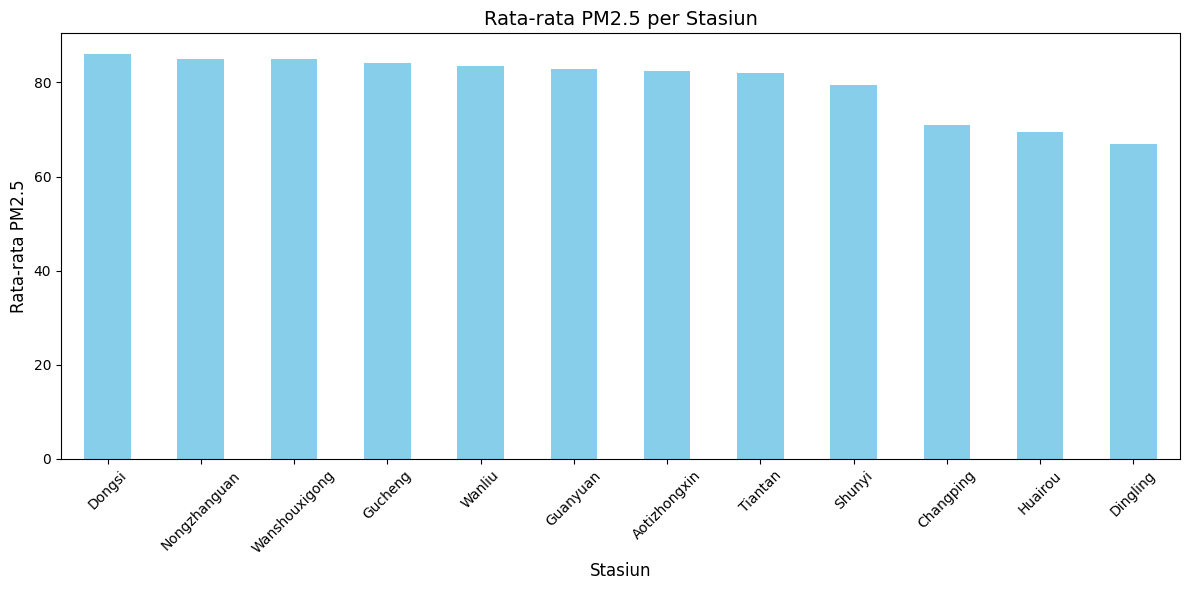

In [127]:
# Visualisasi rata-rata PM2.5 per stasiun
plt.figure(figsize=(12, 6))
avg_pm25_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

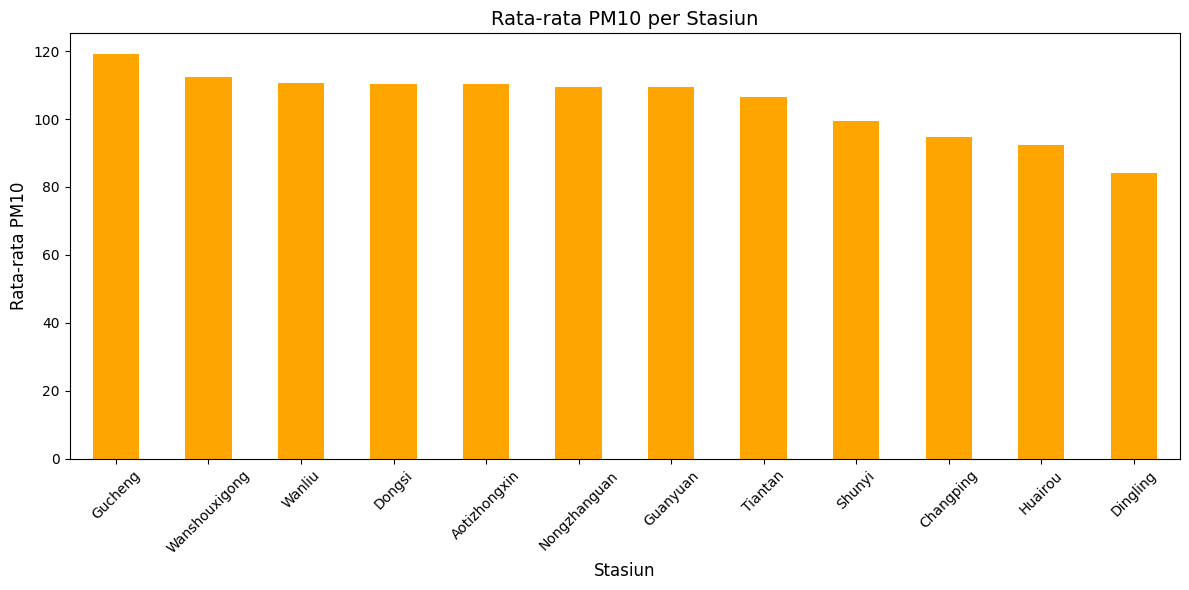

In [128]:
# Visualisasi rata-rata PM10 per stasiun
plt.figure(figsize=(12, 6))
avg_pm10_station.plot(kind='bar', color='orange')
plt.title('Rata-rata PM10 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata PM10', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bagaimana tren bulanan dan tahunan polutan utama?

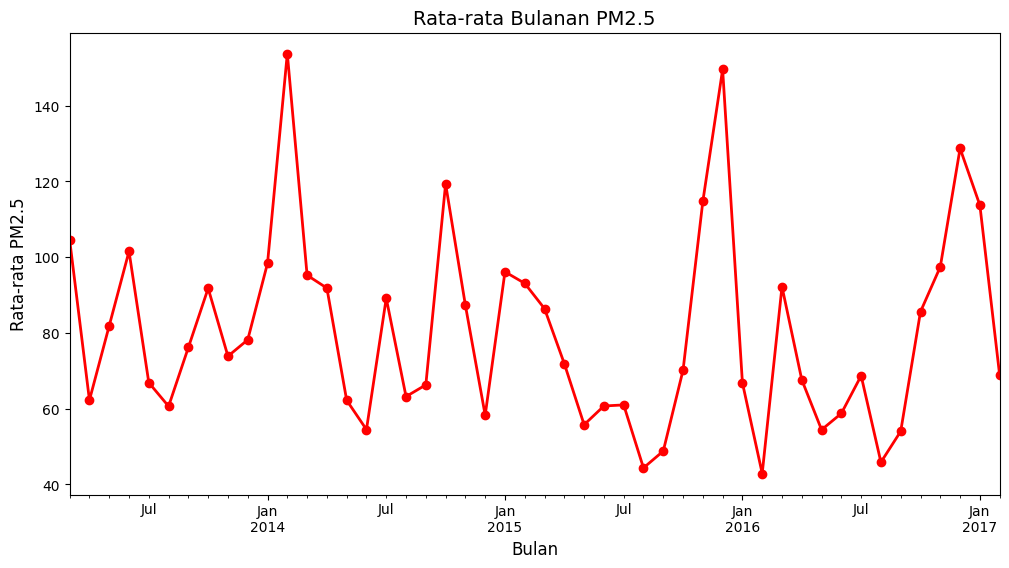

In [247]:
# Visualisasi rata-rata bulanan PM2.5
plt.figure(figsize=(12, 6))
monthly_avg_pm25.plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.title('Rata-rata Bulanan PM2.5', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.show()

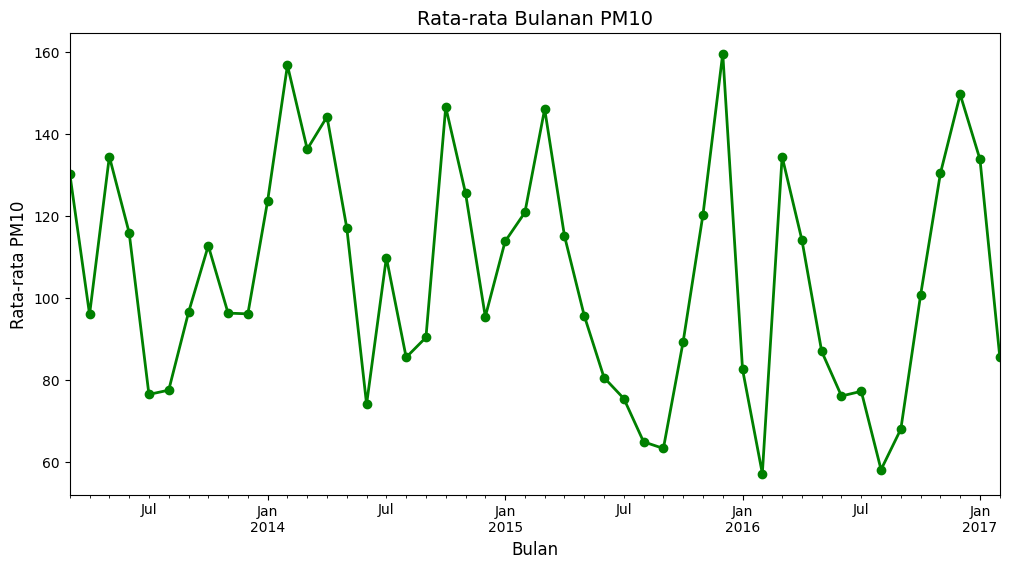

In [248]:
# Visualisasi rata-rata bulanan PM10
plt.figure(figsize=(12, 6))
monthly_avg_pm10.plot(color='green', marker='o', linestyle='-', linewidth=2)
plt.title('Rata-rata Bulanan PM10', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata PM10', fontsize=12)
plt.show()

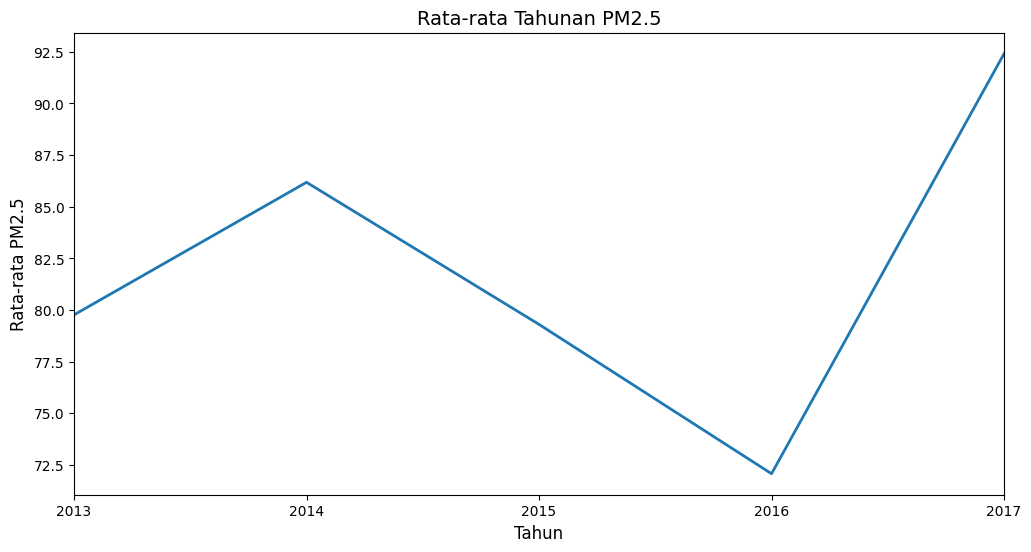

In [173]:
# Visualisasi rata-rata tahunan PM2.5
plt.figure(figsize=(12, 6))
yearly_avg_pm25.plot(linewidth=2)
plt.title('Rata-rata Tahunan PM2.5', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.show()

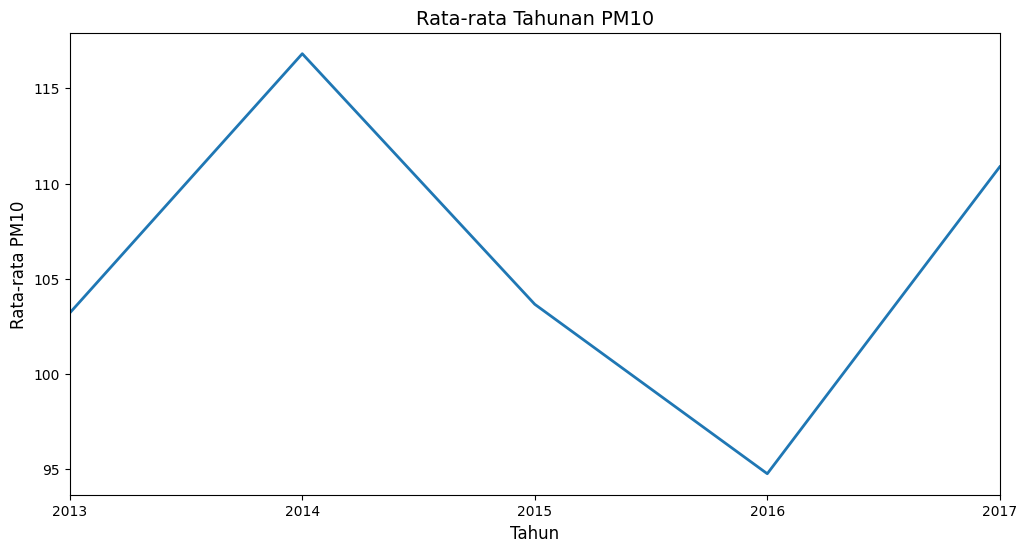

In [255]:
# Visualisasi rata-rata tahunan PM10
plt.figure(figsize=(12, 6))
yearly_avg_pm10.plot(linewidth=2)
plt.title('Rata-rata Tahunan PM10', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata PM10', fontsize=12)
plt.show()

### Bagaimana Hubungan antara Polutan dan Kondisi Cuaca seperti Suhu dan Tekanan?

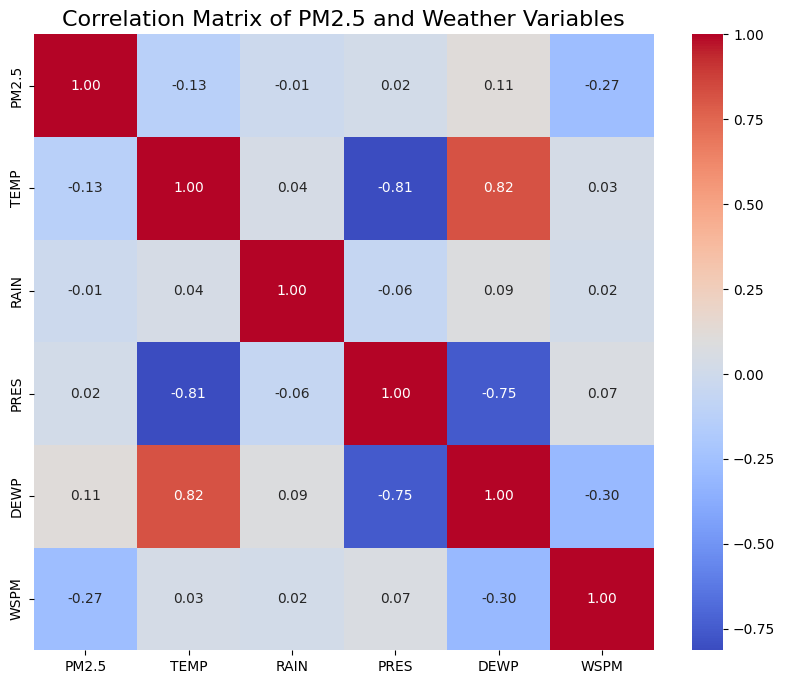

In [133]:
# heatmap melihat korelasi antara polutan PM2.5 dengan weather variables

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pm25, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of PM2.5 and Weather Variables', fontsize=16)
plt.show()

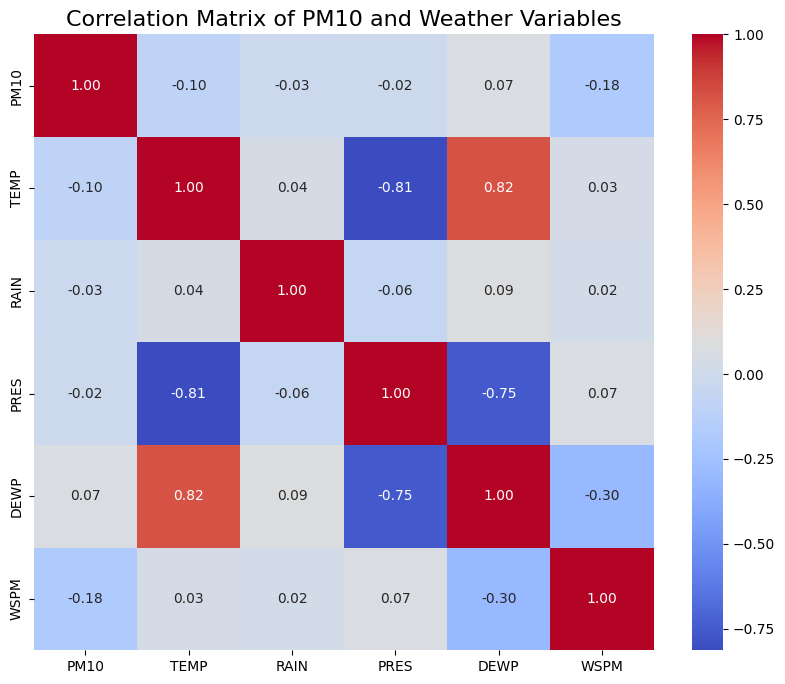

In [134]:
# heatmap melihat korelasi antara polutan PM10 dengan weather variables

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_pm10, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of PM10 and Weather Variables', fontsize=16)
plt.show()

### Berapa proporsi rata-rata polutan?

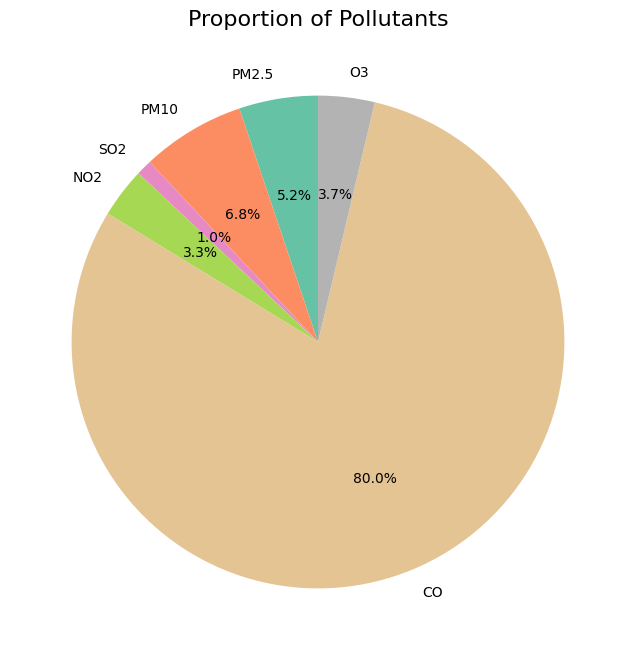

In [135]:
# Proporsi rata-rata polutan

pollutant_avg = all_station_dfs[['PM2.5', 'PM10', 'SO2', 'NO2','CO','O3']].mean()
pollutant_avg.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90, colormap='Set2')
plt.title('Proportion of Pollutants', fontsize=16)
plt.ylabel('')
plt.show()

### Melihat tren bulanan dan tahunan polutan lainnya

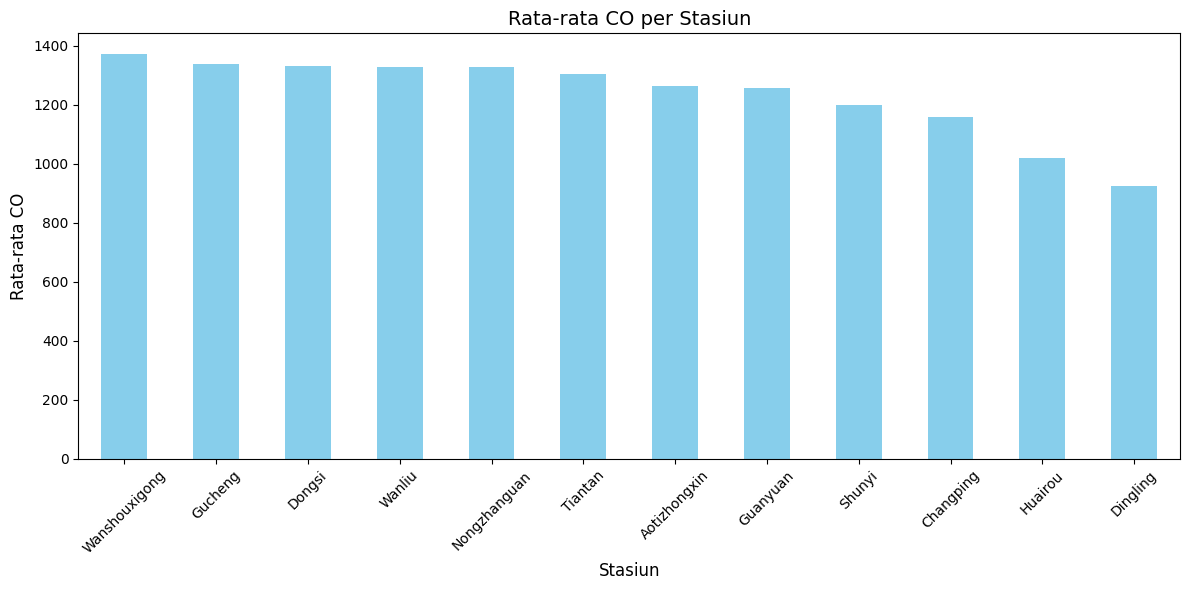

In [136]:
# Visualisasi rata-rata CO per stasiun

plt.figure(figsize=(12, 6))
avg_co_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata CO per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata CO', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

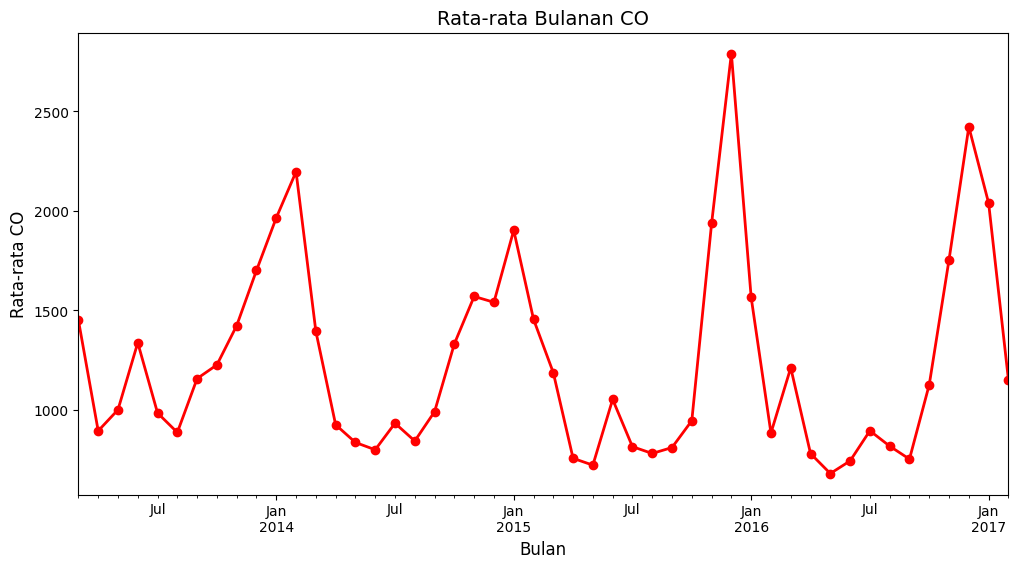

In [175]:
# Visualisasi rata-rata bulanan CO

plt.figure(figsize=(12, 6))
monthly_avg_co.plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.title('Rata-rata Bulanan CO', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata CO', fontsize=12)
plt.show()

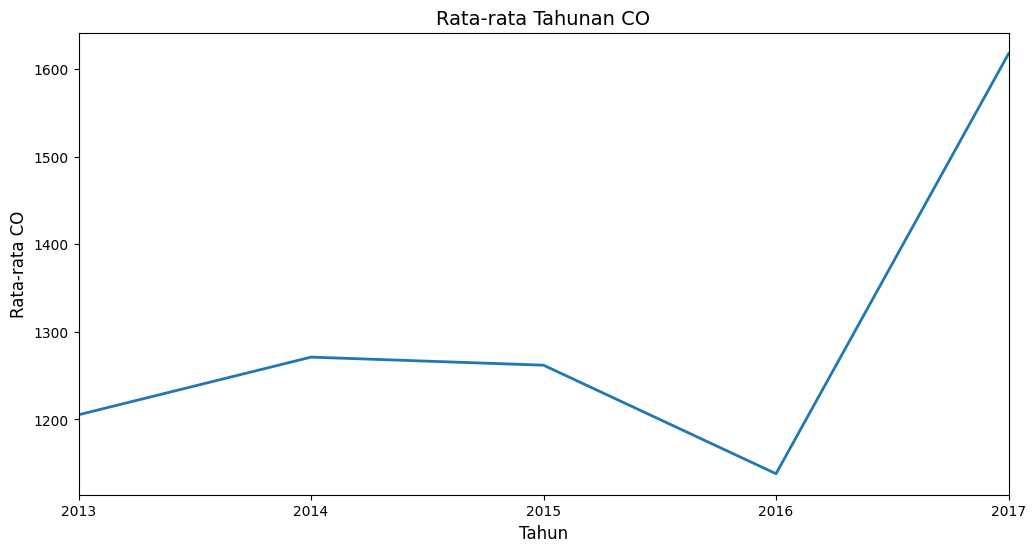

In [176]:
# Visualisasi rata-rata tahunan CO
plt.figure(figsize=(12, 6))
yearly_avg_co.plot(linewidth=2)
plt.title('Rata-rata Tahunan CO', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata CO', fontsize=12)
plt.show()

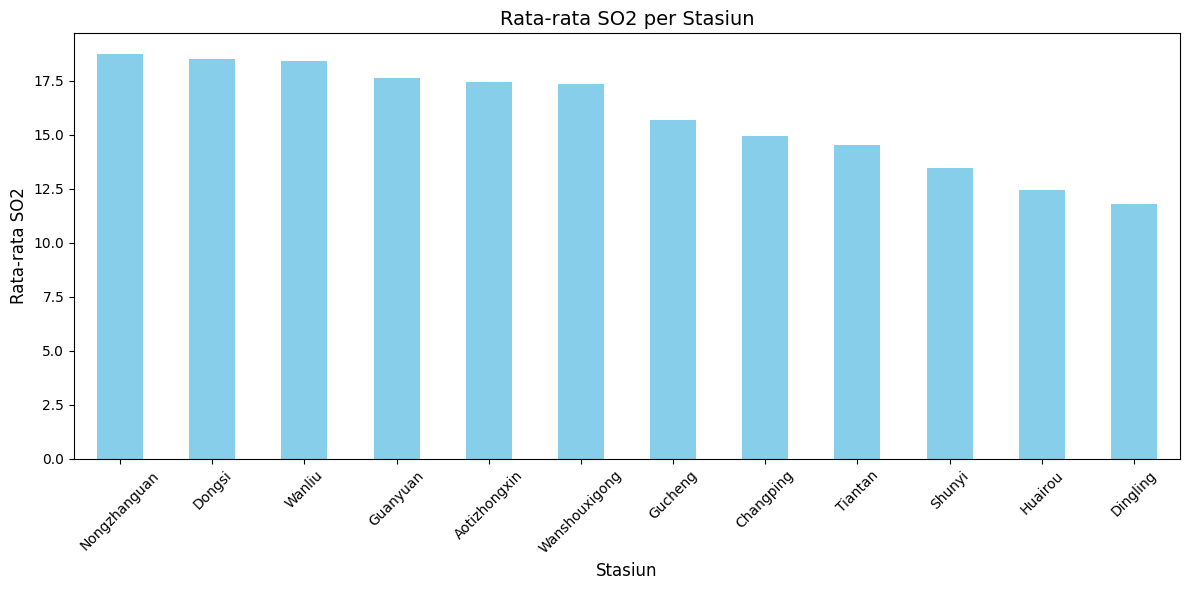

In [139]:
# Visualisasi rata-rata SO2 per stasiun

plt.figure(figsize=(12, 6))
avg_so2_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata SO2 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata SO2', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

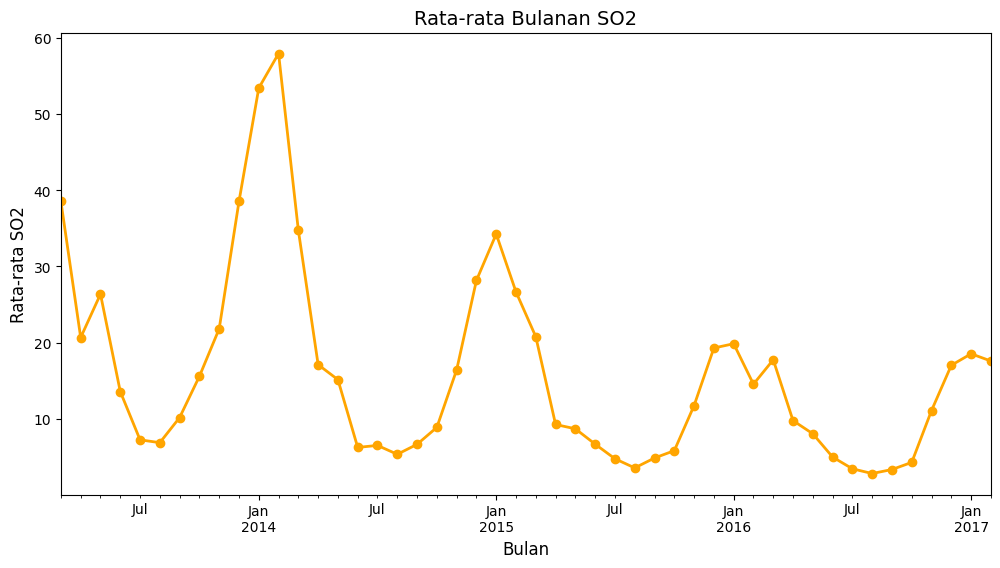

In [169]:
# Visualisasi rata-rata bulanan SO2

plt.figure(figsize=(12, 6))
monthly_avg_so2.plot(color='orange', marker='o', linestyle='-', linewidth=2)
plt.title('Rata-rata Bulanan SO2', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata SO2', fontsize=12)
plt.show()

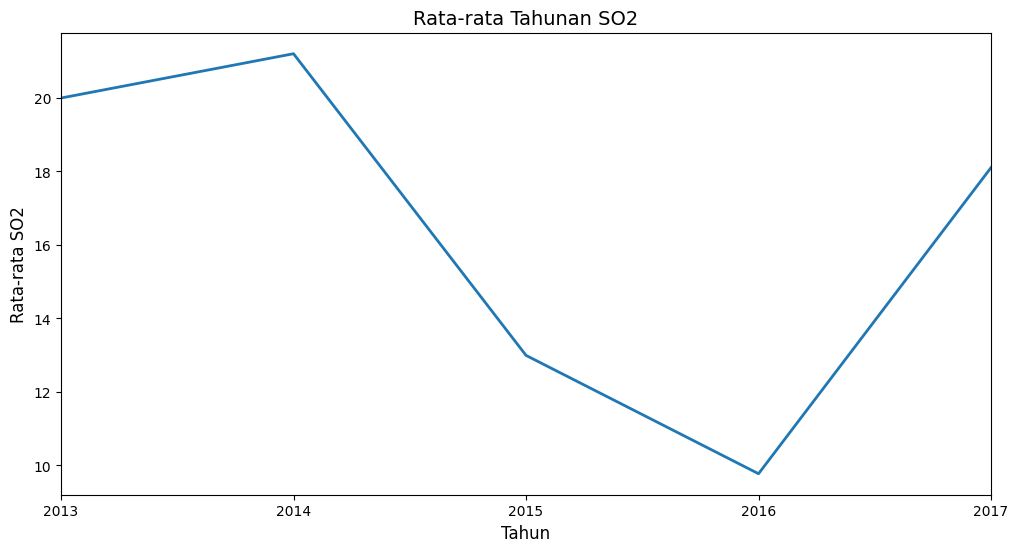

In [177]:
# Visualisasi rata-rata tahunan SO2

plt.figure(figsize=(12, 6))
yearly_avg_so2.plot(linewidth=2)
plt.title('Rata-rata Tahunan SO2', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata SO2', fontsize=12)
plt.show()

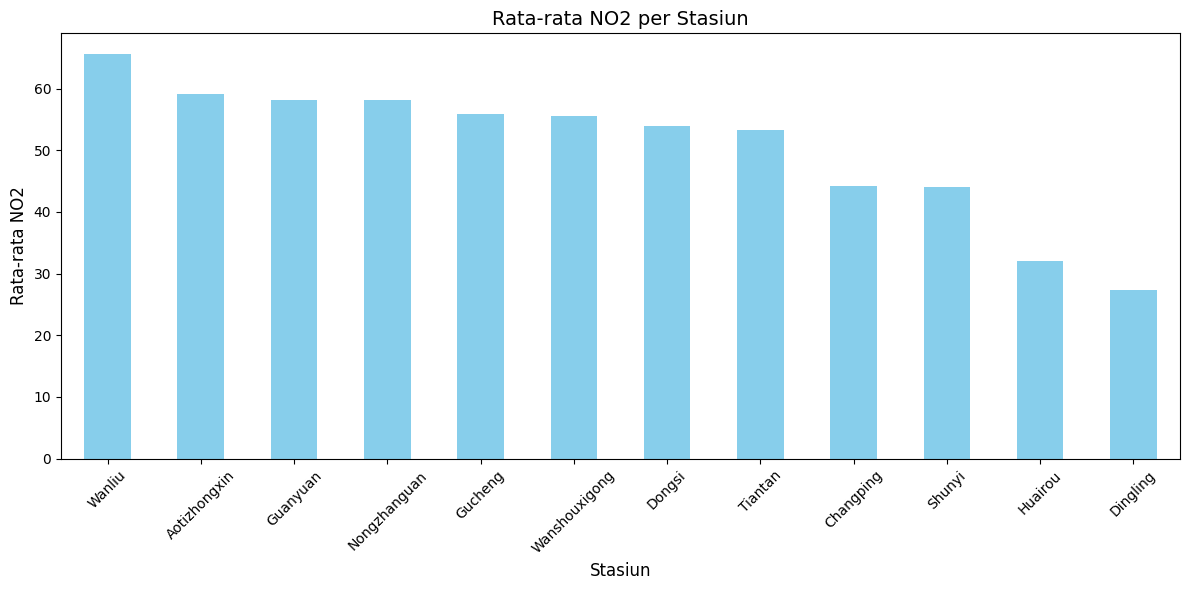

In [142]:
# Visualisasi rata-rata NO2 per stasiun

plt.figure(figsize=(12, 6))
avg_no2_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata NO2 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata NO2', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

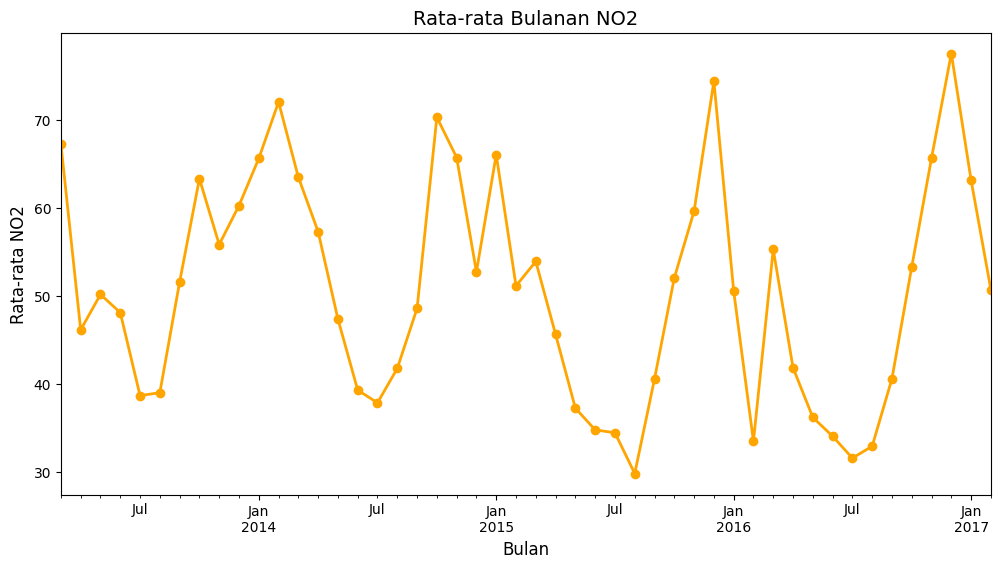

In [178]:
# Visualisasi rata-rata bulanan NO2

plt.figure(figsize=(12, 6))
monthly_avg_no2.plot(color='orange', marker='o', linestyle='-', linewidth=2)
plt.title('Rata-rata Bulanan NO2', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata NO2', fontsize=12)
plt.show()

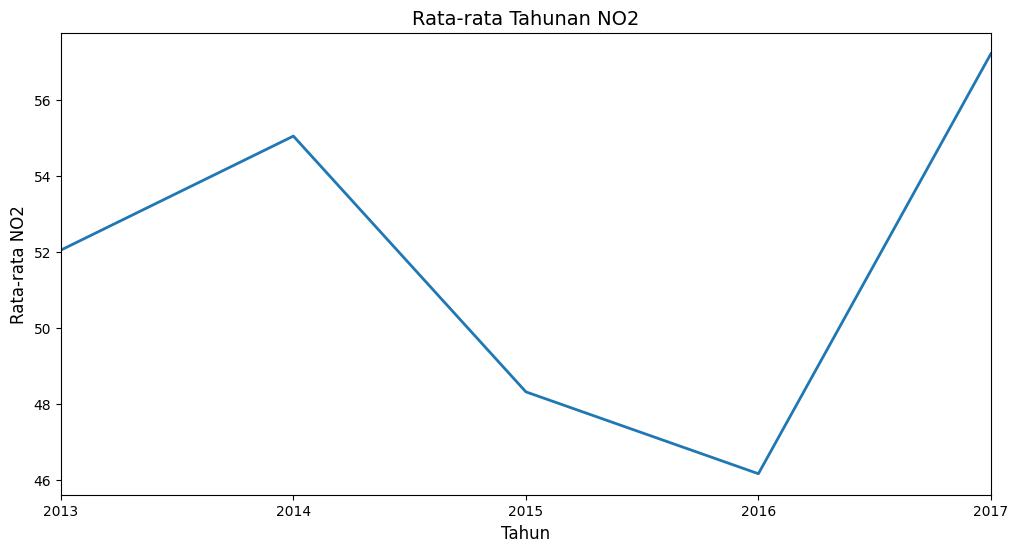

In [179]:
# Visualisasi rata-rata tahunan NO2

plt.figure(figsize=(12, 6))
yearly_avg_no2.plot(linewidth=2)
plt.title('Rata-rata Tahunan NO2', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata NO2', fontsize=12)
plt.show()

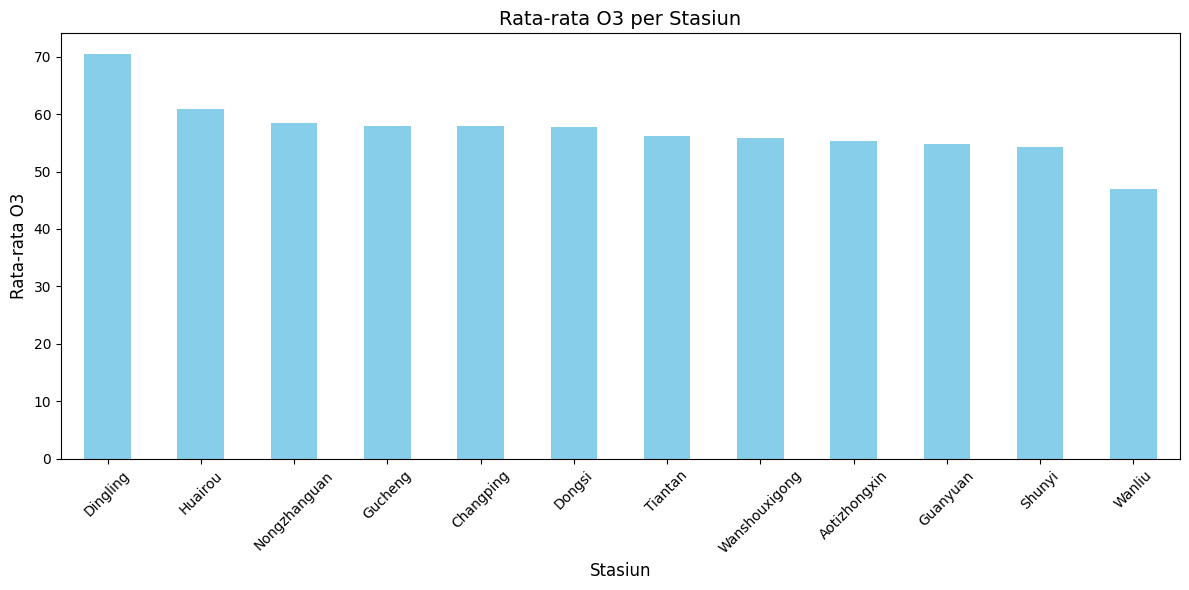

In [145]:
# Visualisasi rata-rata O3 per stasiun

plt.figure(figsize=(12, 6))
avg_o3_station.plot(kind='bar', color='skyblue')
plt.title('Rata-rata O3 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata O3', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

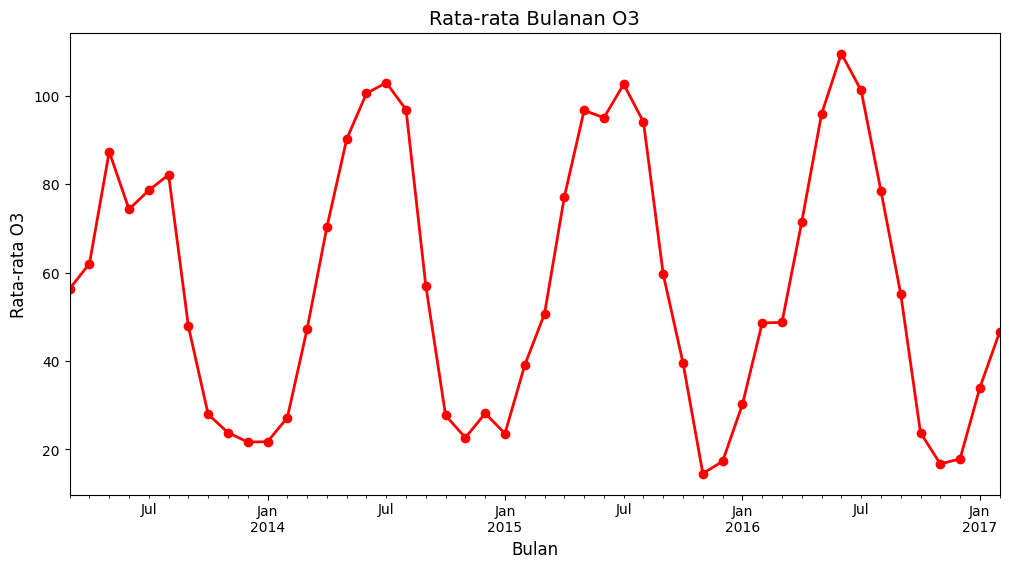

In [180]:
# Visualisasi rata-rata bulanan O3

plt.figure(figsize=(12, 6))
monthly_avg_o3.plot(color='red', marker='o', linestyle='-', linewidth=2)
plt.title('Rata-rata Bulanan O3', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Rata-rata O3', fontsize=12)
plt.show()

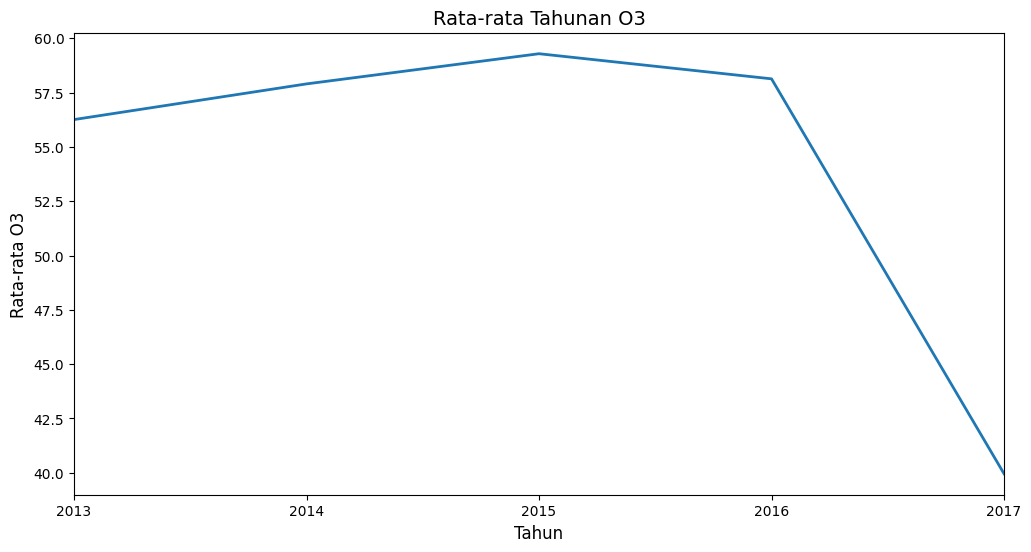

In [181]:
# Visualisasi rata-rata tahunan O3

plt.figure(figsize=(12, 6))
yearly_avg_o3.plot(linewidth=2)
plt.title('Rata-rata Tahunan O3', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata O3', fontsize=12)
plt.show()

### Apakah Ada pola musiman dalam Kadar Polutan Utama?

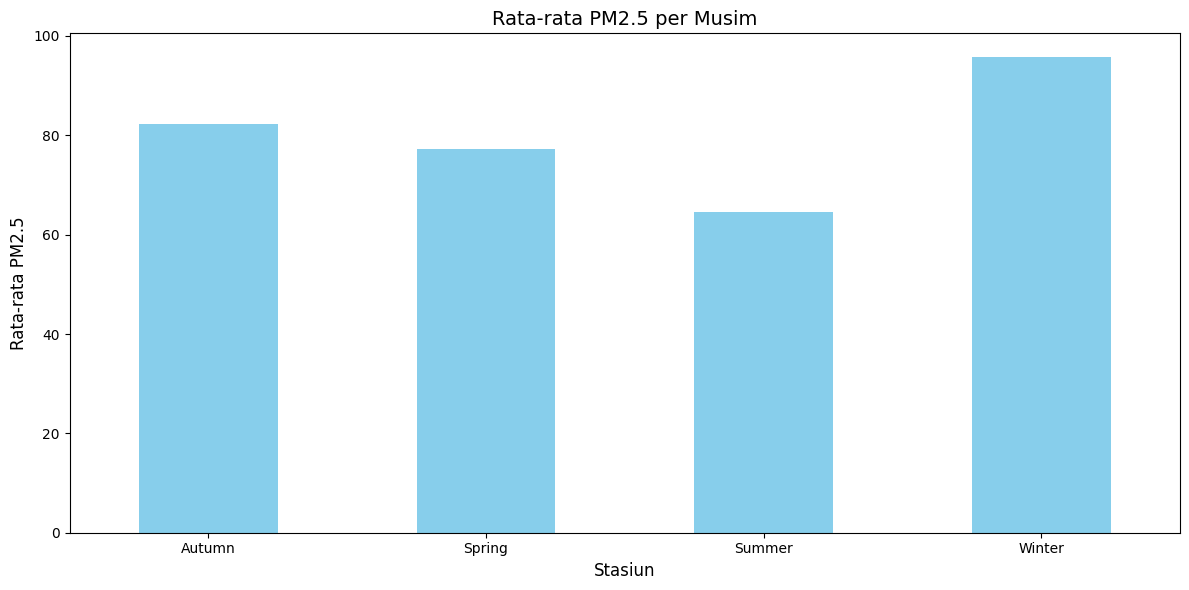

In [148]:
# Visualisasi rata-rata PM2.5 per musim
plt.figure(figsize=(12, 6))
seasonal_avg_pm25.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 per Musim', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata PM2.5', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

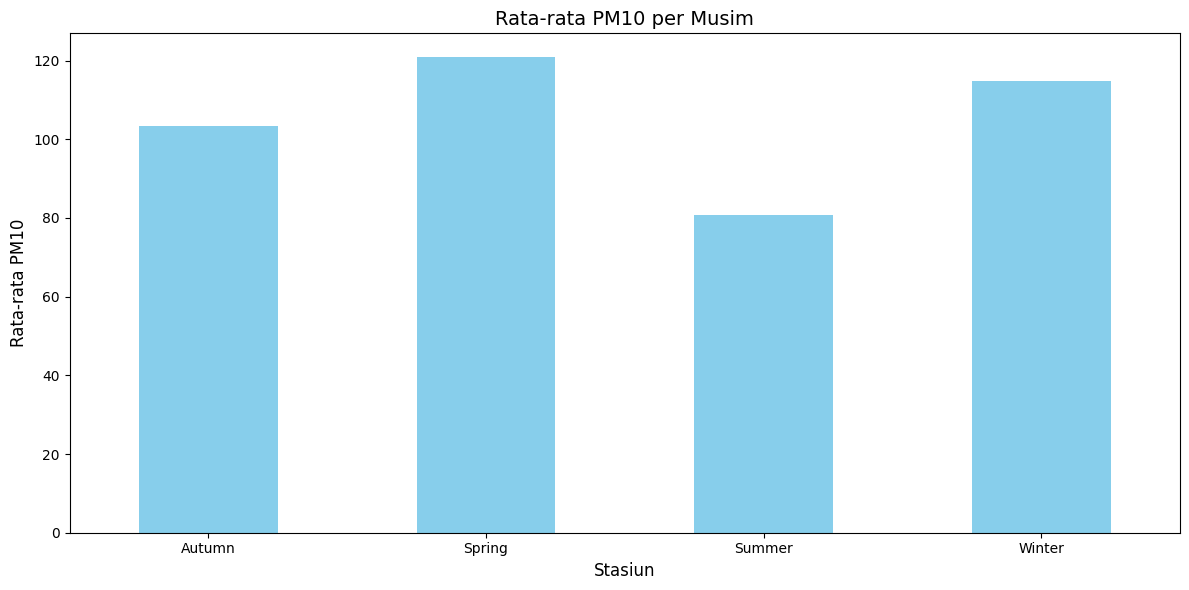

In [149]:
# Visualisasi rata-rata PM10 per musim
plt.figure(figsize=(12, 6))
seasonal_avg_pm10.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM10 per Musim', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata PM10', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Apakah Ada pola musiman dalam Kadar Polutan lainnya?

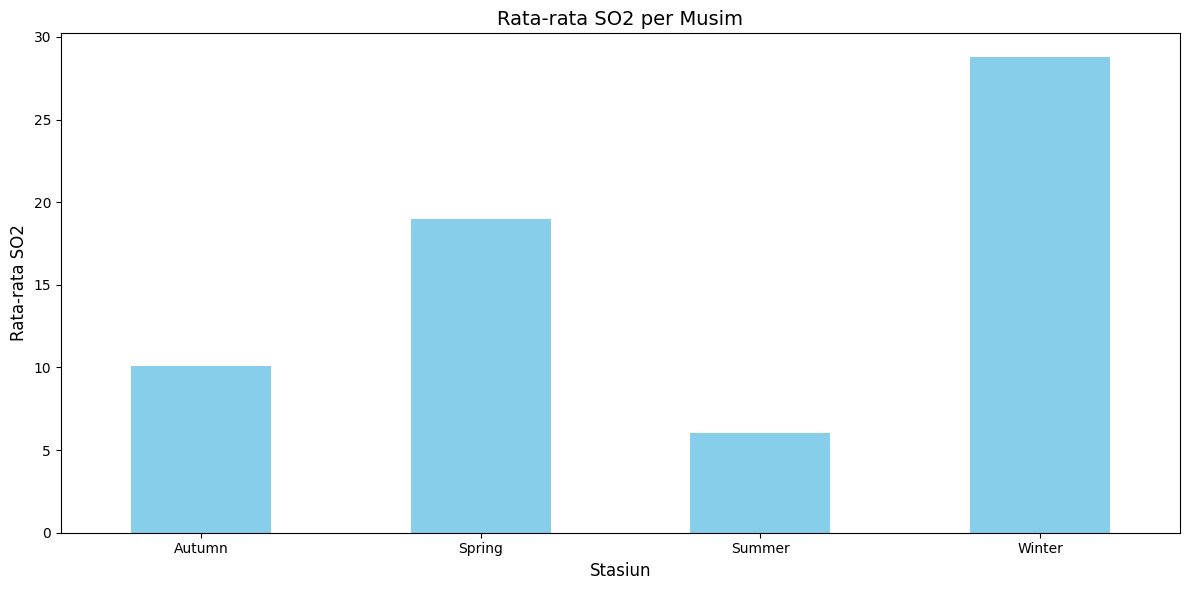

In [150]:
# Visualisasi rata-rata SO2 per musim
plt.figure(figsize=(12, 6))
seasonal_avg_so2.plot(kind='bar', color='skyblue')
plt.title('Rata-rata SO2 per Musim', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata SO2', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

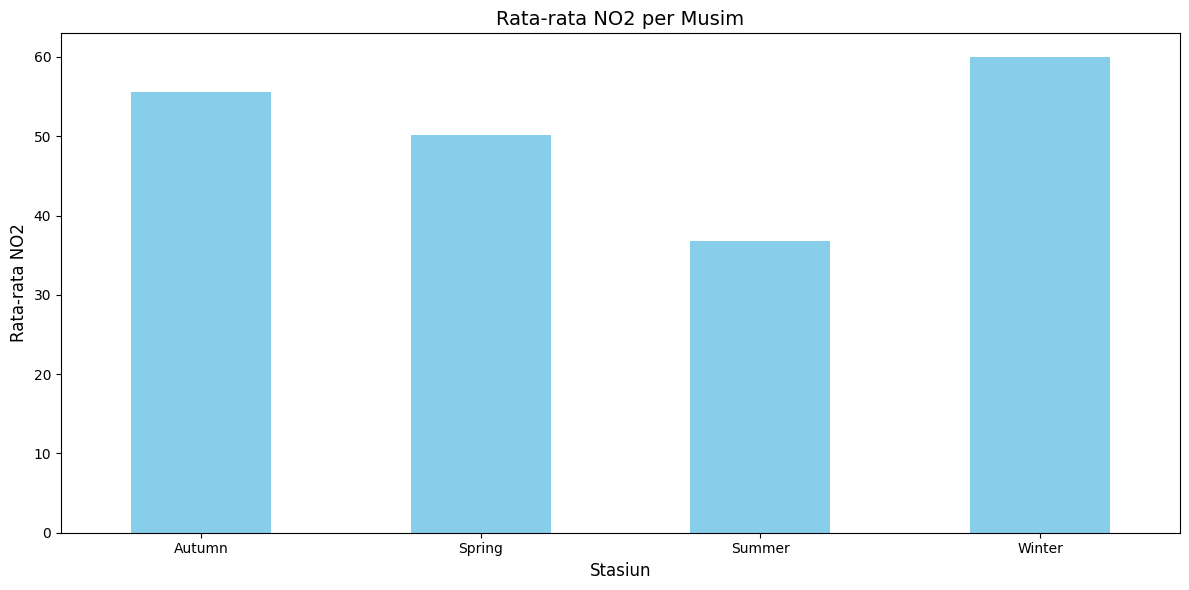

In [151]:
# Visualisasi rata-rata NO2 per musim
plt.figure(figsize=(12, 6))
seasonal_avg_no2.plot(kind='bar', color='skyblue')
plt.title('Rata-rata NO2 per Musim', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata NO2', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

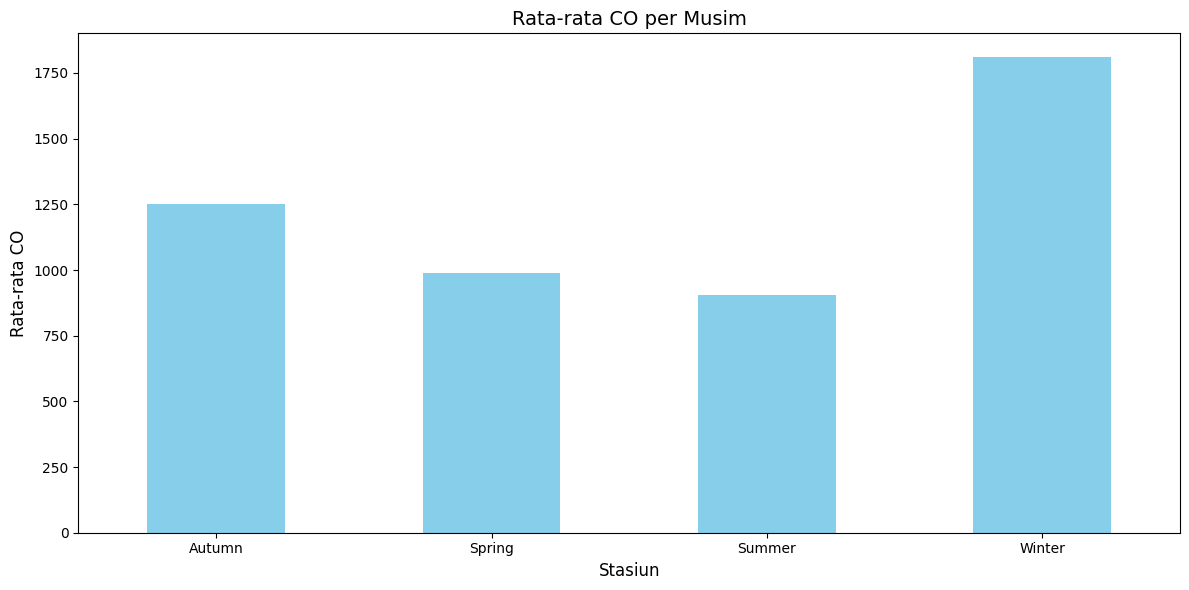

In [152]:
# Visualisasi rata-rata CO per musim
plt.figure(figsize=(12, 6))
seasonal_avg_co.plot(kind='bar', color='skyblue')
plt.title('Rata-rata CO per Musim', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata CO', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

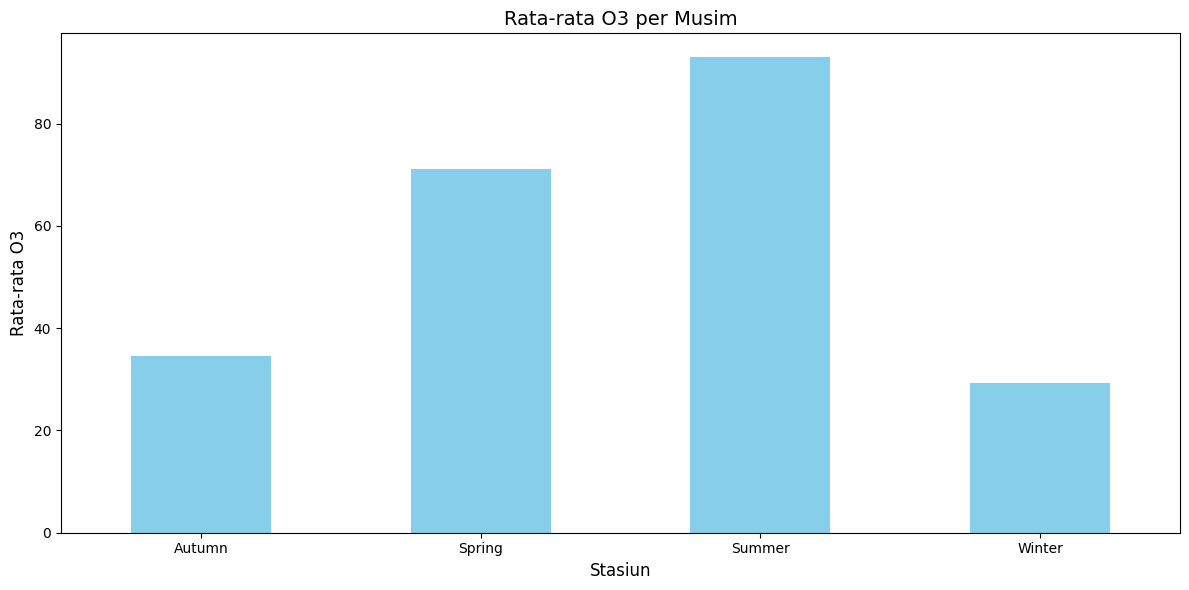

In [153]:
# Visualisasi rata-rata O3 per musim
plt.figure(figsize=(12, 6))
seasonal_avg_o3.plot(kind='bar', color='skyblue')
plt.title('Rata-rata O3 per Musim', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Rata-rata O3', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insight

- Rata-rata polutan utama terendah keduanya pada stasiun dingling, perlu dianalisis lebih lanjut apakah itu akibat dari hasil interpolasi atau tidak
- Terlihat bahwa rata rata polutan di tahun 2014 dan 2016 terdapat kenaikan maupun penurunan yang signifikan, apakah terdapat outliers atau fenomena tertentu. sehingga ini perlu dianalisis lebih lanjut.
- Proporsi polutan CO menjadi paling tinggi, diikuti dengan polutan utama yaitu kedua PM10 dan ketiga PM2.5
- Terlihat terdapat pola pada rata-rata bulanan setiap polutan
- Musim dingin (winter) menjadi musim tertinggi terjadinya polusi PM.25, juga pada polutan SO2, NO2, CO
- Sedangkan PM10 menunjukkan paling banyak terjadi pada musim semi (spring)
- untuk O3 paling banyak terjadi pada musim panas (summer),
- perlu dianalisis lebih lanjut terkait dengan perubahan suhu dan variabel cuaca lainnya untuk pengaruh pada musim

## Analisis Lanjutan menggunakan Seasonal Decomposition of Time Series

Tujuan dari Seasonal Decomposition of Time Series (Classical Decomposition) ini untuk membagi data menjadi komponen-komponen utama yang mudah dipahami yaitu trend, seasonal, dan residual yang sangat berguna dengan data dengan pola musiman (seperti data PRSA). 

Dilakukan analisis lanjutan STL ini dengan menggunakan pendekatan multiplicative yang lebih sesuai dengan data PRSA.

In [154]:
all_station_dfs.sample(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
datetime,,,,,,,,,,,,,,,
2015-06-21 10:00:00,20219,76.0,94.0,5.0,75.0,600.0,101.0,27.0,1005.3,15.7,0.0,ESE,1.0,Aotizhongxin,Summer
2016-11-15 18:00:00,32539,52.0,81.0,10.0,61.0,1400.0,11.0,6.8,1013.6,-8.4,0.0,ENE,1.2,Dingling,Autumn
2015-02-24 01:00:00,17402,154.0,196.0,10.0,57.0,1700.0,8.0,-3.0,1013.0,-8.9,0.0,NE,2.1,Tiantan,Winter
2013-05-30 19:00:00,2180,61.0,182.0,17.0,96.0,400.0,178.0,29.1,997.2,9.2,0.0,SW,2.5,Wanshouxigong,Spring
2015-01-29 06:00:00,16783,101.0,101.0,21.0,45.0,1300.0,17.0,-2.0,1021.0,-7.3,0.0,S,1.8,Gucheng,Winter
2014-10-19 21:00:00,14350,167.0,185.0,7.0,91.0,1300.0,34.0,17.2,1011.5,13.3,0.0,SW,1.4,Tiantan,Autumn
2016-05-12 21:00:00,28054,19.0,125.0,2.0,15.0,300.0,48.0,12.9,1008.8,2.7,0.0,NW,1.9,Huairou,Spring
2015-11-14 23:00:00,23736,269.0,269.0,10.0,96.0,3900.0,3.0,8.3,1013.4,5.4,0.0,WSW,0.8,Aotizhongxin,Autumn
2016-06-25 00:00:00,29089,3.0,15.0,2.0,31.0,300.0,61.0,26.7,1003.2,5.0,0.0,NW,2.2,Guanyuan,Summer


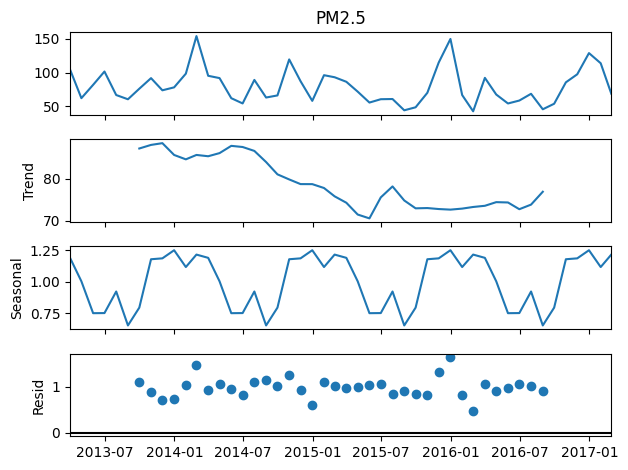

In [239]:
from statsmodels.tsa.seasonal import seasonal_decompose

all_station_dfs.set_index('datetime', inplace=True)
sd_monthly_pm25 = all_station_dfs['PM2.5'].resample('ME').mean()

decomposition = seasonal_decompose(sd_monthly_pm25, model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.show()

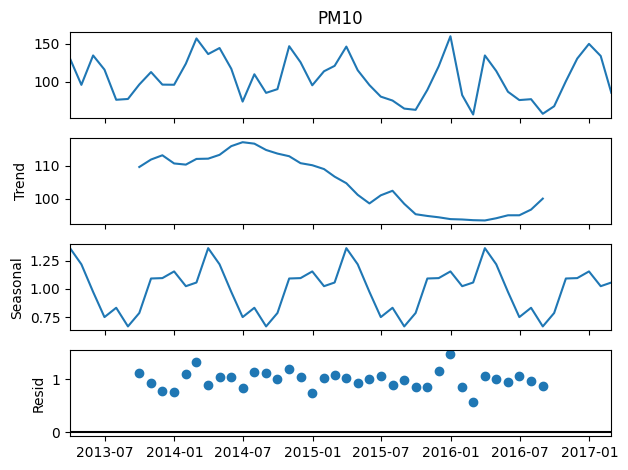

In [242]:
sd_monthly_pm10 = all_station_dfs['PM10'].resample('ME').mean()

decomposition = seasonal_decompose(sd_monthly_pm10, model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.show()

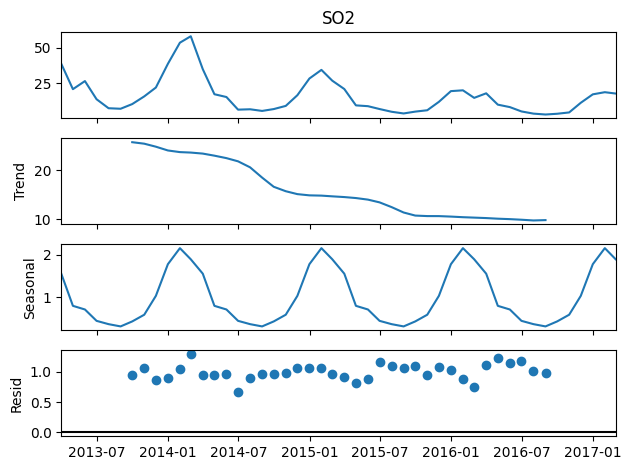

In [243]:
sd_monthly_so2 = all_station_dfs['SO2'].resample('ME').mean()

decomposition = seasonal_decompose(sd_monthly_so2, model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.show()

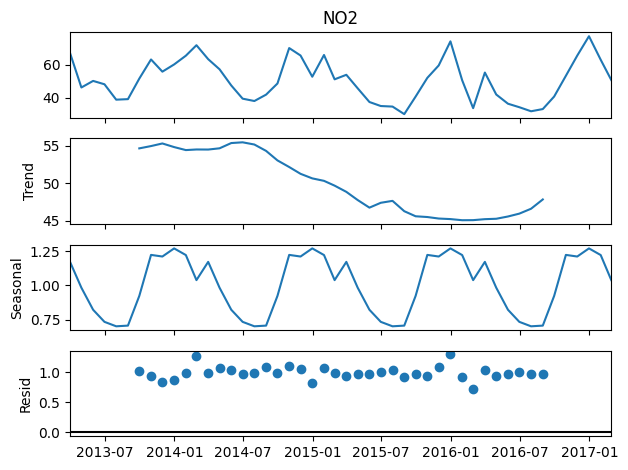

In [158]:
sd_monthly_no2 = all_station_dfs['NO2'].resample('ME').mean()

decomposition = seasonal_decompose(sd_monthly_no2, model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.show()

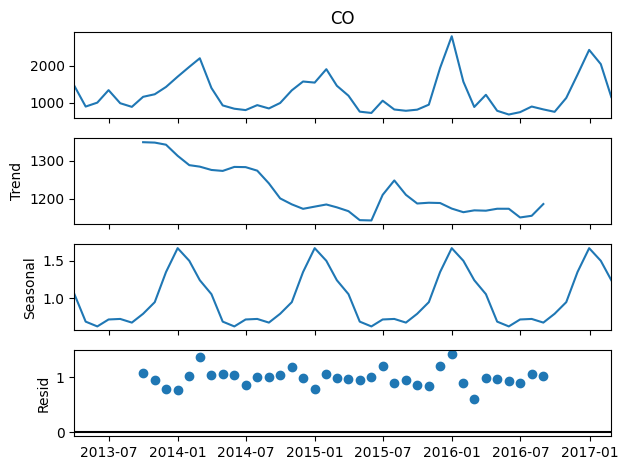

In [244]:
sd_monthly_co = all_station_dfs['CO'].resample('ME').mean()

decomposition = seasonal_decompose(sd_monthly_co, model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.show()

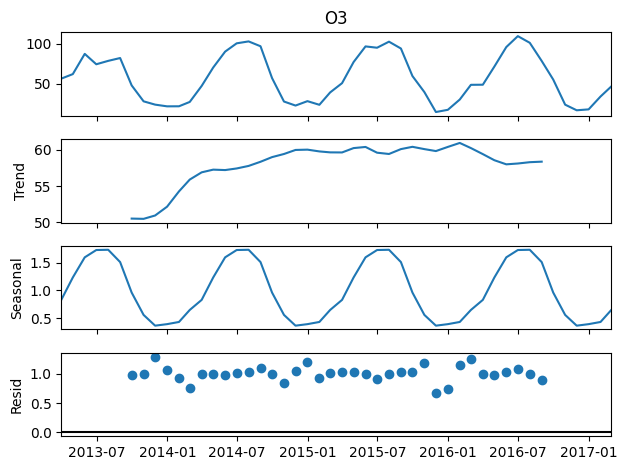

In [160]:
sd_monthly_o3 = all_station_dfs['O3'].resample('ME').mean()

decomposition = seasonal_decompose(sd_monthly_o3, model='multiplicative', period=12)

# Visualisasi hasil dekomposisi
decomposition.plot()
plt.show()

In [161]:
all_station_dfs.to_csv("all_station_dfs.csv", index=False)

In [219]:
all_station_dfs.head(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
datetime,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Spring
2013-03-01 01:00:00,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,Spring
2013-03-01 02:00:00,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,Spring
2013-03-01 03:00:00,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,Spring
2013-03-01 04:00:00,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,Spring
2013-03-01 05:00:00,6,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,N,3.7,Aotizhongxin,Spring
2013-03-01 06:00:00,7,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin,Spring
2013-03-01 07:00:00,8,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Aotizhongxin,Spring
2013-03-01 08:00:00,9,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Aotizhongxin,Spring


In [220]:
all_station_dfs.tail(10)

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
datetime,,,,,,,,,,,,,,,
2017-02-28 14:00:00,35055,3.0,6.0,2.0,5.0,250.0,82.0,14.6,1013.3,-15.6,0.0,N,3.6,Wanshouxigong,Winter
2017-02-28 15:00:00,35056,11.0,21.0,2.0,5.0,200.0,81.0,15.4,1013.0,-15.0,0.0,NNW,3.3,Wanshouxigong,Winter
2017-02-28 16:00:00,35057,6.0,20.0,3.0,8.5,200.0,80.0,14.9,1012.6,-15.4,0.0,NW,2.1,Wanshouxigong,Winter
2017-02-28 17:00:00,35058,11.0,23.0,3.0,12.0,300.0,87.0,14.2,1012.5,-14.9,0.0,NW,3.1,Wanshouxigong,Winter
2017-02-28 18:00:00,35059,11.0,30.0,2.0,16.0,300.0,82.0,13.4,1013.0,-15.5,0.0,WNW,1.4,Wanshouxigong,Winter
2017-02-28 19:00:00,35060,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,Winter
2017-02-28 20:00:00,35061,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,Winter
2017-02-28 21:00:00,35062,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,Winter
2017-02-28 22:00:00,35063,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,Winter


In [221]:
all_station_dfs.columns.tolist()

['No',
 'PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM',
 'station',
 'season']

In [222]:
all_station_dfs.sort_values(by="datetime", inplace=True)
all_station_dfs.reset_index(inplace=True)

In [228]:
all_station_dfs.head(10)

,datetime,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,season
0,2013-03-01,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,Spring
1,2013-03-01,1,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan,Spring
2,2013-03-01,1,4.0,4.0,3.0,2.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,Spring
3,2013-03-01,1,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu,Spring
4,2013-03-01,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,Spring
5,2013-03-01,1,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi,Spring
6,2013-03-01,1,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan,Spring
7,2013-03-01,1,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong,Spring
8,2013-03-01,1,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou,Spring
9,2013-03-01,1,6.0,18.0,5.0,5.0,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng,Spring


In [234]:
all_station_dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  420768 non-null  datetime64[ns]
 1   No        420768 non-null  int64         
 2   PM2.5     420768 non-null  float64       
 3   PM10      420768 non-null  float64       
 4   SO2       420768 non-null  float64       
 5   NO2       420768 non-null  float64       
 6   CO        420768 non-null  float64       
 7   O3        420768 non-null  float64       
 8   TEMP      420768 non-null  float64       
 9   PRES      420768 non-null  float64       
 10  DEWP      420768 non-null  float64       
 11  RAIN      420768 non-null  float64       
 12  wd        420768 non-null  object        
 13  WSPM      420768 non-null  float64       
 14  station   420768 non-null  object        
 15  season    420768 non-null  object        
dtypes: datetime64[ns](1), float64(11), int

In [235]:
all_station_dfs.to_csv("all_station_dfs.csv", index=False)

# Conclusion

### Conclusion Pertanyaan 1: Bagaimana rata-rata Polutan Utama (PM2.5 & PM10) di Setiap Stasiun?

- Terlihat dari data bahwa rata-rata tertinggi untuk polutan PM2,5 adalah terjadi di Stasiun Dongsi, sedangkan rata rata terendahnya adalah di stasiun Dingling
- untuk Polutan PM10, rata-rata tertinggi adalah terjadi di stasiun Gucheng, sedangkan rata rata terendahnya adalah di stasiun Dingling

### Conclusion Pertanyaan 2: Stasiun Mana yang Memiliki Tingkat Polusi Tertinggi dan Terendah?

In [262]:
df_pollution = pd.DataFrame({
    'pm25': avg_pm25_station,
    'pm10': avg_pm10_station,
    'co': avg_co_station,
    'so2': avg_so2_station,
    'no2': avg_no2_station,
    'o3': avg_o3_station
})

# Menambahkan kolom untuk total polusi (menggunakan rata-rata dari semua parameter polusi)
df_pollution['total_pollution'] = df_pollution.mean(axis=1)

# Mengurutkan stasiun berdasarkan total polusi tertinggi
df_sorted_pollution = df_pollution[['total_pollution']].sort_values(by='total_pollution', ascending=False)

print(df_sorted_pollution)

               total_pollution
station                       
Wanshouxigong       283.328441
Gucheng             278.494094
Dongsi              276.427414
Nongzhanguan        276.253189
Wanliu              275.653993
Tiantan             269.636726
Aotizhongxin        264.884174
Guanyuan            263.527111
Shunyi              248.062339
Changping           239.981789
Huairou             214.498736
Dingling            197.617223


Stasiun dengan tingkat polusi tertinggi adalah stasiun Wanshouxigong, terendah pada stasiun Dingling

### Conclusion Pertanyaan 3: Bagaimana tren bulanan dan tahunan polutan utama?

**Dilihat dari rata-rata bulanan dan tahunan (agregasi statistik):**

Pada PM2,5:
- Terlihat dari rata-rata bulanan terdapat pola musiman yang terjadi, selalu terjadi kenaikan pada bulan 09 sampai bulan 12 atau dimusim dingin. lalu terdapat penurunan pada bulan 04 dan 05
- Terlihat dari rata-rata tahunan, terjadi peningkatan di 2014 lalu terjadi penurunan di 2015 dan signifikan turun di 2016. Setelah itu meningkat signifikan pada 2017.

Pada PM10:
- Terlihat dari rata-rata bulanan terdapat pola musiman yang terjadi juga, selalu terjadi kenaikan pada bulan 09 sampai bulan 12 lalu terjadi lagi pada bulan 01 sampai 03
- Terlihat dari rata-rata tahunan, terjadi peningkatan signifikan di 2014 lalu terjadi penurunan di 2015 dan signifikan turun di 2016. Setelah itu meningkat signifikan pada 2017.


**Jika dilihat dari Classical Decomposition:**
- untuk tren jangka panjangnya terlihat mengalami penurunan, tetapi ada lonjakan kecil pada 2015 sekitar bulan 08 sampai 09
- tren bisa dilihat mulai naik ketika 2016 akhir

### Conclusion Pertanyaan 4: Bagaimana Hubungan antara Polutan Utama dengan Kondisi Cuaca seperti Suhu, Tekanan, dan lainnya?

Dilihat dari Heatmap correlation antara Polutan Utama dengan variable cuaca, menunjukkan bahwa tidak ada korelasi yang kuat antara polutan utama (PM2,5 dan PM10) dengan variable cuaca.

secara detail seperti ini:
- PM2.5 dan kecepatan angin (WSPM), di mana kecepatan angin yang lebih tinggi sedikit mengurangi konsentrasi PM2.5.
- Korelasi negatif yang lemah dengan suhu (TEMP) pada PM2.5 dan PM10 bisa berarti bahwa peningkatan suhu sedikit berhubungan dengan penurunan polutan, tetapi efeknya sangat kecil.

### Concluion Pertanyaan 4: Apakah Ada Pola Musiman dalam Kadar Polutan Utama?

- Dilihat dari hasil Classical Decomposition pada plot Seasonal, terdapat pola musiman yang terjadi berulang pada PM2,5 dan PM10.
- Jika dilihat dengan detail, untuk PM2,5 pada awal dan pertengahan tahun terdapat peningkatan dan terjadi penurunan saat mulai memasuki penghujung tahun. Pola musiman ini terus berlangsung mengikuti perubahan musim
- Begitu juga terjadi pada PM10, terdapat lonjakan signifikan pada bulan bulan tertentu mengikuti perubahan musim.
- Sehingga kedua polutan utama terdapat pola musiman yang ditunjukkan dari hasil dekomposisi.